## Expedition Clustering Full Dataset Labeling

In order to verify our clustering is working effectively, let's identify and label a set of expeditions.

Let's say 10 (and more if we deem necessary!)

And while we're at it, we can get an idea of the spatiotemporal separations (epsilon, or ϵ) and Levenshtein distances we can expect in expeditions to use in clustering later.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime

from plotting import plot_time_histogram, plot_geographical_positions, plot_geographical_heatmap,  plot_geographical_heatmap_by_day

In [3]:
df = pd.read_csv("../data/clean_df.csv", on_bad_lines = "skip", index_col=0)
df.columns = map(str.lower, df.columns)

/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_28180/2053134998.py:1: DtypeWarning: Columns (4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/clean_df.csv", on_bad_lines = "skip", index_col=0)


In [4]:
# Add a cluster column for cluster_id
df['cluster'] = np.nan

In [5]:
df = df.sort_values(by='startdate')

In [6]:
# Define the regex pattern for the desired date format
date_pattern = r'^\d{4}-\d{2}-\d{2}$'

# Keep rows where 'startdate' matches the date pattern
df = df[df['startdate'].str.match(date_pattern, na=True)]

# Convert 'startdate' to datetime
df['startdate'] = pd.to_datetime(df['startdate'], errors='coerce')

# Define date range
min_date = datetime(1700, 1, 1)
max_date = datetime.today()

# Filter rows within the date range
df = df[(df['startdate'] >= min_date) & (df['startdate'] <= max_date)]


/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_28180/748237333.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['startdate'] = pd.to_datetime(df['startdate'], errors='coerce')


In [7]:
df

collectingeventid  startdate     enddate  \
562463             711558 1764-01-01         NaN   
560667             709178 1764-08-01  1764-09-01   
828045            1012049 1765-01-01         NaN   
531127             671923 1765-01-01         NaN   
541951             684451 1765-04-01         NaN   
...                   ...        ...         ...   
813130             996140 2024-09-30         NaN   
813131             996141 2024-10-09         NaN   
813132             996142 2024-10-14         NaN   
813133             996143 2024-10-17         NaN   
813134             996144 2024-10-17         NaN   

                                                  remarks  localityid  \
562463                                                NaN    668826.0   
560667              Tithy malus arboreuns [?] prosp. alp.    666371.0   
828045                                                NaN    947381.0   
531127                                                NaN    629522.0   
541951                                                NaN    641521.0   
...                                                   ...         ...   
813130  Open, sunny. At top of bank of creek and road ...    931454.0   
813131  Open, sunny, lightly vegetated cobble/gravel b...    931455.0   
813132  Very steep, north- to northwest-facing, open, ...    931456.0   
813133  Flat, ruderal, weedy gravel area at the edge o...    931457.0   
813134  Flat, ruderal, weedy area and adjacent man-mad...    931458.0   

        minelevation  maxelevation  elevationaccuracy  latitude1  longitude1  \
562463           NaN           NaN                NaN        NaN         NaN   
560667           NaN           NaN                NaN        NaN         NaN   
828045           NaN           NaN                NaN        NaN         NaN   
531127           NaN           NaN                NaN        NaN         NaN   
541951           NaN           NaN                NaN        NaN         NaN   
...              ...           ...                ...        ...         ...   
813130          15.0           NaN                NaN  47.053971 -122.719350   
813131         620.0           NaN                NaN  46.857071 -122.306897   
813132         100.0           NaN                NaN  47.031033 -122.912741   
813133         200.0           NaN                NaN  46.974439 -122.880993   
813134         205.0           NaN                NaN  46.973870 -122.882312   

                                             localityname namedplace  \
562463                                        Unspecified        NaN   
560667                                        Unspecified        NaN   
828045                                        Maiomesio*.        NaN   
531127                                        Unspecified        NaN   
541951                                        Unspecified        NaN   
...                                                   ...        ...   
813130  unincorporated county, west side of Hartman Rd...        NaN   
813131  unincorporated county, Mashel River, 0.2 miles...        NaN   
813132  Olympia, southeast side of Lakeridge Dr SW, 70...        NaN   
813133  unincorporated county, vacant lot, 125 feet so...        NaN   
813134  unincorporated county, northwestern edge of a ...        NaN   

        geographyid  centroidlat  centroidlon     commonname  \
562463          4.0        48.69         9.14            NaN   
560667          2.0         7.19        21.09            NaN   
828045        198.0        39.76       -98.50  United States   
531127          4.0        48.69         9.14            NaN   
541951          4.0        48.69         9.14            NaN   
...             ...          ...          ...            ...   
813130      25774.0        46.92      -100.00            NaN   
813131      20673.0        47.03      -100.00            NaN   
813132      25774.0        46.92      -100.00            NaN   
813133      25774.0        46.92      -1

In [8]:

df['startdate'] = pd.to_datetime(df['startdate'])
df['latitude1'] = df['latitude1'].astype(float)
df['longitude1'] = df['longitude1'].astype(float)


In [9]:
df[['latitude1', 'longitude1', 'localityname']].head(5)

latitude1  longitude1 localityname
562463        NaN         NaN  Unspecified
560667        NaN         NaN  Unspecified
828045        NaN         NaN  Maiomesio*.
531127        NaN         NaN  Unspecified
541951        NaN         NaN  Unspecified

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


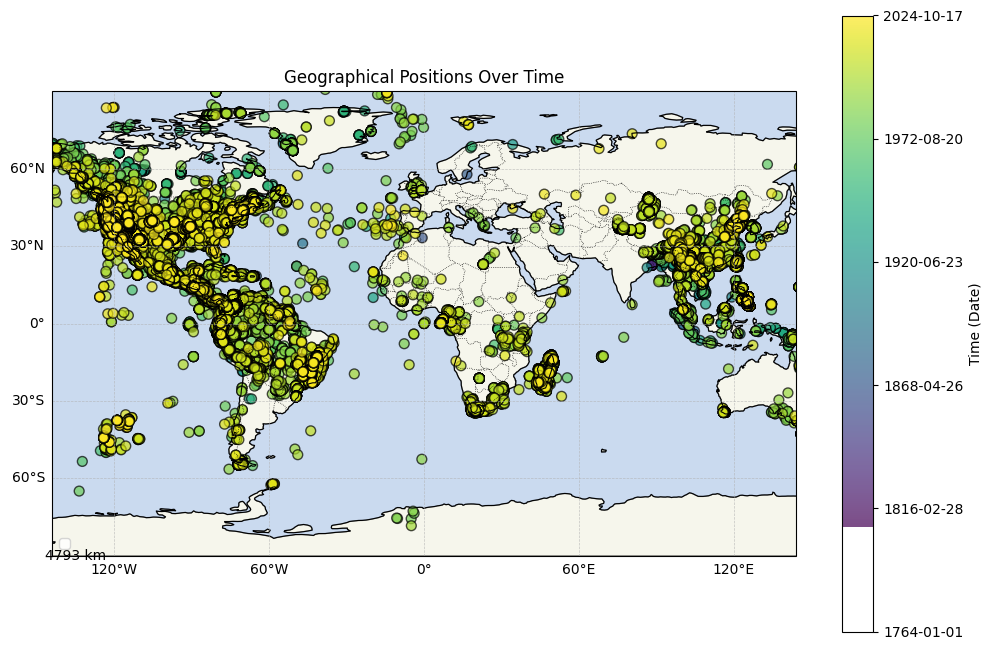

In [10]:
plot_geographical_positions(df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom='auto', plot_towns=False)

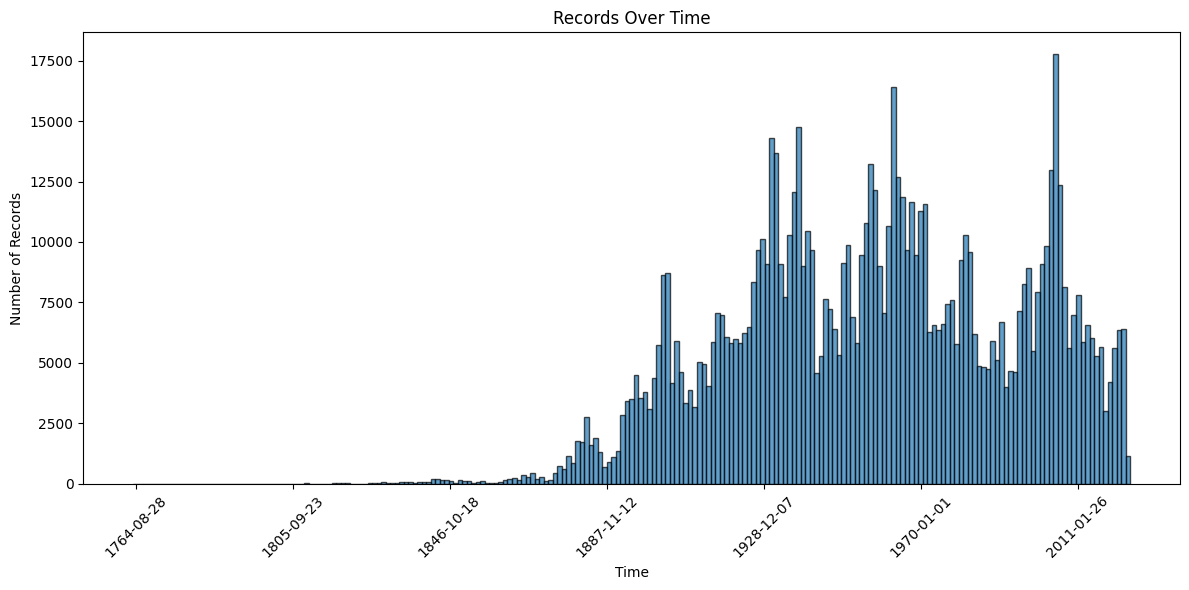

In [11]:
plot_time_histogram(df, datetime_col='startdate')

Lets do some manual expedition cluster labeling!

First, let's look at the distance between records that seem to be in a single cluster... Let's find the max of a couple that seem like they belong _together_

Let's start small, then increase radius

# 1. Cluster Labeling

To locate a cluster, let's start with a fairly wide net.

Lat / lon +- 0.5º (~70 mile radius)

Start Date +- 6 months (1 year radius)

In [12]:
# samp_colleventid_l = list(df.collectionobjectid.sample(10, random_state=123))
# samp_colleventid_l

In [311]:
samp_collobjid_l = [325334, 203161, 275379, 189769, 306553, 305052, 53269, 124799, 104780, 177087]

samp_colleventid_l = [162061, 232746, 57595, 189769, 819069, 126488, 78191]

collection object ids: [325334, 203161, 275379, 189769, 306553, 305052, 53269, 124799, 104780, 177087]

collecting event ids: [138184, 100868, 109731, 125154, 140665, 118001, 57595, 155686, 61448, 152848]

## a.) Collection Object ID: 162061

In [109]:
samp_record = df[df.collectingeventid == samp_colleventid_l[0]]
samp_record

collectingeventid  startdate enddate remarks  localityid  \
102720             162061 1934-06-11     NaN     NaN    162061.0   

        minelevation  maxelevation  elevationaccuracy  latitude1  longitude1  \
102720        5200.0           NaN                NaN    41.4506 -120.359497   

                     localityname namedplace  geographyid  centroidlat  \
102720  Parker Creek, Warner Mts.        NaN      17158.0        41.57   

        centroidlon commonname                                 fullname  \
102720       -100.0        NaN  Modoc County, California, United States   

                name  spatial_flag cluster  
102720  Modoc County             1       0

In [110]:
samp_record_lat = samp_record.latitude1.values[0]
samp_record_lon = samp_record.longitude1.values[0]
samp_record_startdate = samp_record.startdate.values[0]
print('lat:', samp_record_lat, '    lon:', samp_record_lon, '    start date:', samp_record_startdate)

lat: 41.4505996704     lon: -120.3594970703     start date: 1934-06-11T00:00:00.000000000


In [111]:
# Filter overall df to only records within 0.5º lat of the sample lat
test_df = df[abs(df.latitude1 - samp_record_lat) < 0.5].sort_values(by='startdate')

# Filter overall df to only records within 0.5º lon of the sample lon
test_df = test_df[abs(test_df.longitude1 - samp_record_lon) < 0.5].sort_values(by='startdate')

# Filter overall df to only records within 6 months of the sample startdate
test_df = test_df[test_df['startdate'].between(samp_record_startdate - pd.DateOffset(months=6), samp_record_startdate + pd.DateOffset(months=6))]


In [32]:
test_df

collectingeventid  startdate     enddate remarks  localityid  \
96842              152804 1934-05-18  1934-05-18     NaN    152804.0   
74067              117035 1934-06-11  1934-06-11     NaN    117035.0   
11854               19202 1934-06-11  1934-06-11     NaN     19202.0   
102720             162061 1934-06-11         NaN     NaN    162061.0   
41069               65392 1934-06-11  1934-06-11     NaN     65392.0   
...                   ...        ...         ...     ...         ...   
107130             169016 1934-08-29  1934-08-29     NaN    169016.0   
82259              129928 1934-08-29  1934-08-29     NaN    129928.0   
33103               52944 1934-08-29  1934-08-29     NaN     52944.0   
82258              129927 1934-08-29  1934-08-29     NaN    129927.0   
4728                 7639 1934-09-05  1934-09-05     NaN      7639.0   

        minelevation  maxelevation  elevationaccuracy  latitude1  longitude1  \
96842            NaN           NaN                NaN    41.7347 -120.741900   
74067         5200.0        5200.0                0.0    41.4506 -120.359500   
11854         5200.0        5200.0                0.0    41.4506 -120.359500   
102720        5200.0           NaN                NaN    41.4506 -120.359497   
41069         5200.0        5200.0                0.0    41.4506 -120.359500   
...              ...           ...                ...        ...         ...   
107130        5200.0        5200.0                0.0    41.4543 -120.327600   
82259         5200.0        5200.0                0.0    41.4543 -120.327600   
33103         5200.0        5200.0                0.0    41.4543 -120.327600   
82258         5200.0        5200.0                0.0    41.4543 -120.327600   
4728             NaN           NaN                NaN    41.5625 -120.267800   

                                  localityname namedplace  geographyid  \
96842                  Near Timbered Mountain.        NaN      17158.0   
74067                            Parker Creek.        NaN      17158.0   
11854           Parker Creek, Warner Mountains        NaN      17158.0   
102720               Parker Creek, Warner Mts.        NaN      17158.0   
41069                Parker Creek, Warner Mts.        NaN      17158.0   
...                                        ...        ...          ...   
107130                           Parker Creek.        NaN      17158.0   
82259                            Parker Creek.        NaN      17158.0   
33103                             Parker Creek        NaN      17158.0   
82258                            Parker Creek.        NaN      17158.0   
4728    Summit of Cedar Pass, Warner Mountains        NaN      17158.0   

        centroidlat  centroidlon commonname  \
96842         41.57       -100.0        NaN   
74067         41.57       -100.0        NaN   
11854         41.57       -100.0        NaN   
102720        41.57       -100.0        NaN   
41069         41.57       -100.0        NaN   
...             ...          ...        ...   
107130        41.57       -100.0        NaN   
82259         41.57       -100.0        NaN   
33103         41.57       -100.0        NaN   
82258         41.57       -100.0        NaN   
4728          41.57       -100.0        NaN   

                                       fullname          name  spatial_flag  \
96842   Modoc County, California, United States  Modoc County             1   
74067   Modoc County, California, United States  Modoc County             1   
11854   Modoc County, California, United States  Modoc County             1   
102720  Modoc County, California, United States  Modoc County             1   
41069   Modoc County, California, United States  Modoc County             1   
...                                         ...           ...           ...   
107130  Modoc County, California, United States  Modoc County             1   
82259   Modoc County, California, United States  Modoc County             1   
33103   Modoc Cou

In [33]:
test_df.startdate.value_counts()

startdate
1934-06-11    85
1934-06-13    69
1934-06-12    60
1934-06-15    27
1934-06-16    13
1934-06-14    11
1934-08-01     8
1934-08-29     6
1934-05-18     1
1934-06-30     1
1934-07-03     1
1934-07-13     1
1934-09-05     1
Name: count, dtype: int64

In [34]:
test_df.localityname.value_counts()

localityname
Parker Creek.                                                      50
Parker Creek, Warner Mountains                                     29
Fandango Pass.                                                     25
Parker Creek, Warner Mts.                                          20
Alturas.                                                           14
                                                                   ..
2.5 mi S of Eagleville.                                             1
Patterson Mill Rd., E side of Warner Mts., beside Barber Creek.     1
Patterson Mill Road. Warner Mountains.                              1
North Fork of Barber Creek, Warner Mts.                             1
Summit of Cedar Pass, Warner Mountains                              1
Name: count, Length: 65, dtype: int64

Okay, now there's a little more variation in localityname. 

There's still the Parker Creek group, but now there's also Alturas/Dorris, and Canby groups. Do we think these are part of the same cluster?

In [35]:
test_df.startdate.sort_values().unique()

<DatetimeArray>
['1934-05-18 00:00:00', '1934-06-11 00:00:00', '1934-06-12 00:00:00',
 '1934-06-13 00:00:00', '1934-06-14 00:00:00', '1934-06-15 00:00:00',
 '1934-06-16 00:00:00', '1934-06-30 00:00:00', '1934-07-03 00:00:00',
 '1934-07-13 00:00:00', '1934-08-01 00:00:00', '1934-08-29 00:00:00',
 '1934-09-05 00:00:00']
Length: 13, dtype: datetime64[ns]

In [36]:
cluster_date_l = [
    ('1934-05-18', '1934-05-18'),
    ('1934-06-11', '1934-06-16'),
    ('1934-07-13', '1934-07-13'),
    ('1934-08-01', '1934-08-01'), 
    ('1934-08-29', '1934-08-29'),
    ('1934-09-05', '1934-09-05'),
]

In [38]:
test_df[(pd.to_datetime(cluster_date_l[0][0]) <= test_df['startdate']) & (test_df['startdate'] <= pd.to_datetime(cluster_date_l[0][1]))][['latitude1', 'longitude1', 'remarks', 'localityname', 'startdate', 'enddate']]

latitude1  longitude1 remarks             localityname  startdate  \
96842    41.7347   -120.7419     NaN  Near Timbered Mountain. 1934-05-18   

          enddate  
96842  1934-05-18

This is just one record. Lets look for a more interesting cluster

In [40]:
test_df[(pd.to_datetime(cluster_date_l[1][0]) <= test_df['startdate']) & (test_df['startdate'] <= pd.to_datetime(cluster_date_l[1][1]))][['latitude1', 'longitude1', 'remarks', 'localityname', 'startdate', 'enddate']]

latitude1  longitude1 remarks                    localityname  \
74067     41.4506 -120.359500     NaN                   Parker Creek.   
11854     41.4506 -120.359500     NaN  Parker Creek, Warner Mountains   
102720    41.4506 -120.359497     NaN       Parker Creek, Warner Mts.   
41069     41.4506 -120.359500     NaN       Parker Creek, Warner Mts.   
27946     41.4506 -120.359500     NaN  Parker Creek, Warner Mountains   
...           ...         ...     ...                             ...   
54984     41.4506 -120.359500     NaN  Parker Creek, Warner Mountains   
95509     41.4506 -120.359500     NaN                   Parker Creek.   
119134    41.4506 -120.359500     NaN       Parker Creek, Warner Mts.   
92380     41.4506 -120.359500     NaN                   Parker Creek.   
32576     41.4506 -120.359500     NaN  Parker Creek, Warner Mountains   

        startdate     enddate  
74067  1934-06-11  1934-06-11  
11854  1934-06-11  1934-06-11  
102720 1934-06-11         NaN  
41069  1934-06-11  1934-06-11  
27946  1934-06-11  1934-06-11  
...           ...         ...  
54984  1934-06-16  1934-06-16  
95509  1934-06-16  1934-06-16  
119134 1934-06-16  1934-06-16  
92380  1934-06-16  1934-06-16  
32576  1934-06-16  1934-06-16  

[265 rows x 6 columns]

265 records - lets check it out as our first cluster

### i.) Cluster 0: ('1934-06-11', '1934-06-16')

In [42]:
group0_df = test_df[(pd.to_datetime(cluster_date_l[1][0]) <= test_df['startdate']) & (test_df['startdate'] <= pd.to_datetime(cluster_date_l[1][1]))][['latitude1', 'longitude1','remarks', 'localityname', 'startdate', 'enddate']]

group0_df

latitude1  longitude1 remarks                    localityname  \
74067     41.4506 -120.359500     NaN                   Parker Creek.   
11854     41.4506 -120.359500     NaN  Parker Creek, Warner Mountains   
102720    41.4506 -120.359497     NaN       Parker Creek, Warner Mts.   
41069     41.4506 -120.359500     NaN       Parker Creek, Warner Mts.   
27946     41.4506 -120.359500     NaN  Parker Creek, Warner Mountains   
...           ...         ...     ...                             ...   
54984     41.4506 -120.359500     NaN  Parker Creek, Warner Mountains   
95509     41.4506 -120.359500     NaN                   Parker Creek.   
119134    41.4506 -120.359500     NaN       Parker Creek, Warner Mts.   
92380     41.4506 -120.359500     NaN                   Parker Creek.   
32576     41.4506 -120.359500     NaN  Parker Creek, Warner Mountains   

        startdate     enddate  
74067  1934-06-11  1934-06-11  
11854  1934-06-11  1934-06-11  
102720 1934-06-11         NaN  
41069  1934-06-11  1934-06-11  
27946  1934-06-11  1934-06-11  
...           ...         ...  
54984  1934-06-16  1934-06-16  
95509  1934-06-16  1934-06-16  
119134 1934-06-16  1934-06-16  
92380  1934-06-16  1934-06-16  
32576  1934-06-16  1934-06-16  

[265 rows x 6 columns]

In [44]:
group0_df.localityname.value_counts()

localityname
Parker Creek.                                                                      43
Parker Creek, Warner Mountains                                                     29
Fandango Pass.                                                                     25
Parker Creek, Warner Mts.                                                          20
Alturas.                                                                           14
Between Davis Creek and Plum Valley.                                               12
Fandango Pass, Warner Mountains                                                    10
Plum Valley.                                                                        9
Plum Valley, Warner Mts.                                                            8
6 mi. S of Davis Creek.                                                             8
Dorris Reservoir, 2 mi. E of Alturas.                                               8
Fandango Pass, Warner Mts.               

In [45]:
group0_df.localityname.unique()

array(['Parker Creek.', 'Parker Creek, Warner Mountains',
       'Parker Creek, Warner Mts.', 'Parker Creek. Warner Mountains.',
       'Parker Creek, Warner Mtns.', 'Parker Creek',
       'Between Davis Creek and Plum Valley.', '6 mi. S of Davis Creek.',
       '9 mi. S of Davis Creek.', 'N side of Fandango Valley.',
       'Plum Valley, Warner Mts.', 'Plum Valley.', 'Davis Creek.',
       '6 miles s. of Davis Creek', 'Lassen Creek.',
       'Between Davis Creek and Plum Valley', '7 mi. N of Davis Creek.',
       'Plum Valley above Davis Creek, Warner Mts.',
       'Plum Valley, Warner Mountains', '10 mi. S of New Pine Creek.',
       'Davis Creek', '6 miles south of Davis Creek.',
       'Surprise Station.', 'Fandango Pass.',
       'Fandango Pass, Warner Mts.', 'Fandango Pass, Warner Mountains',
       'Surprise Valley near Fort Bidwell.',
       'Patterson Mill Road, Warner Mountains',
       'North fork of Barber Creek, Warner Mts.',
       'North Fk. of Barber Creek.',
       'Su

In [46]:
group0_df['localityname'].str.contains('parker creek', case=False, na=False).sum()/len(group0_df)

np.float64(0.3584905660377358)

36% of rows have "Parker Creek" in the localityname.

A bunch of mentions of Warner Mtns, Barber Creek, Davis Creek, Alturas, and more.

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


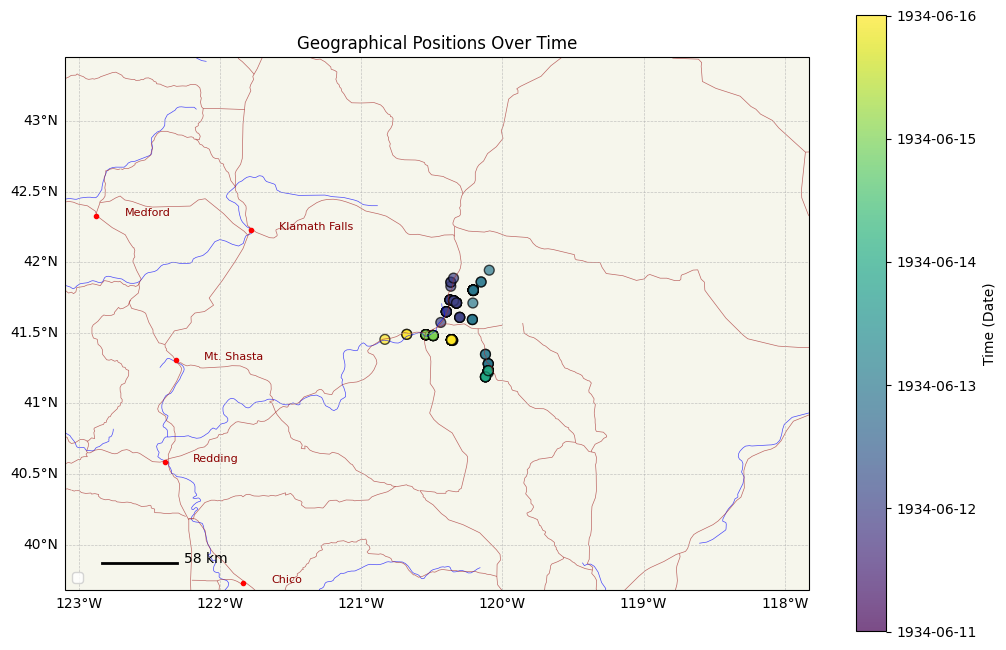

In [47]:
plot_geographical_positions(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=0.5, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


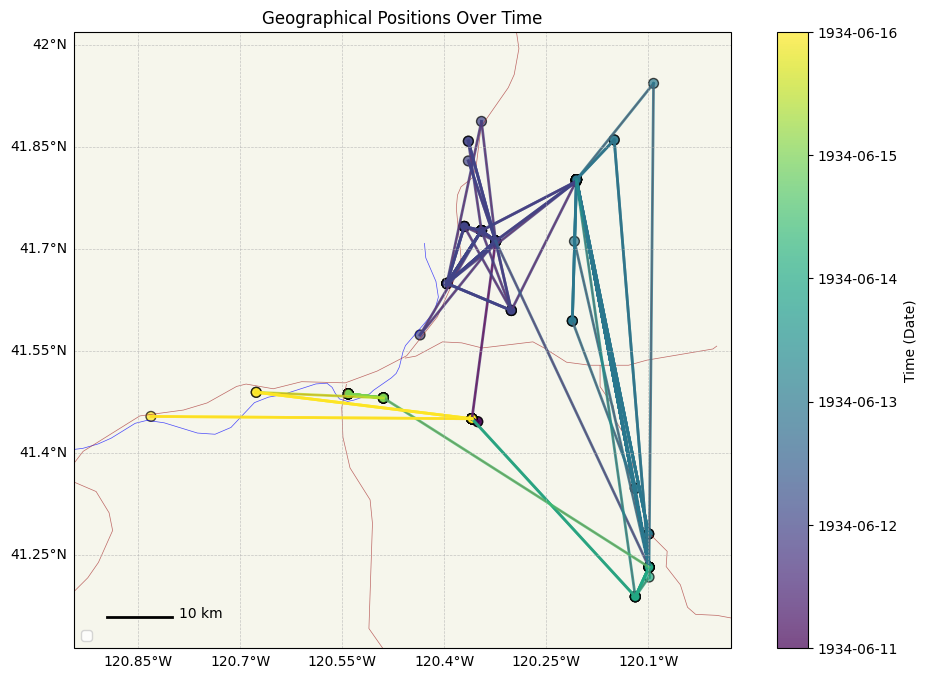

In [48]:
plot_geographical_positions(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',\
                            zoom='auto', cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

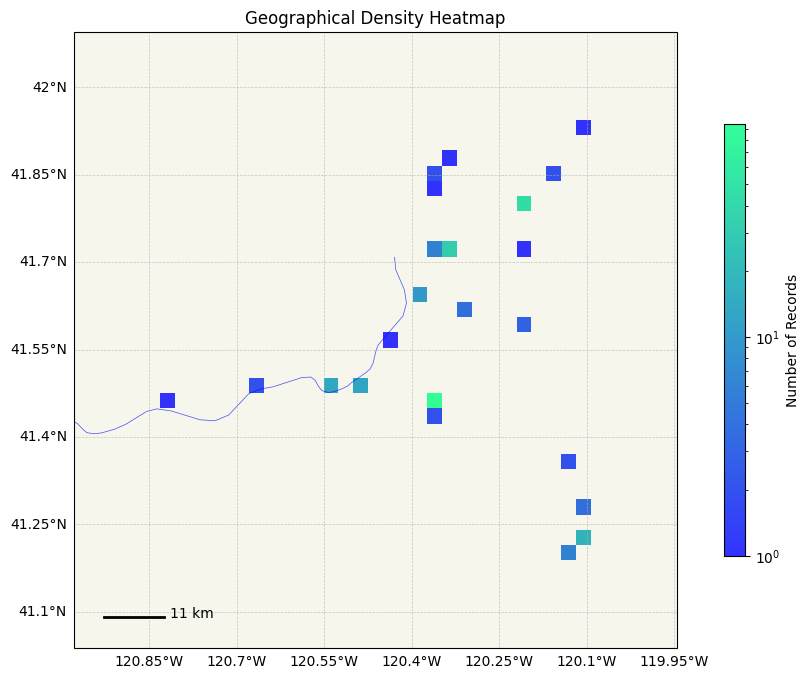

In [49]:
plot_geographical_heatmap(group0_df, lat_col='latitude1', lon_col='longitude1', grid_size=30,
                          zoom=5,  plot_rivers=True, plot_roads=True)


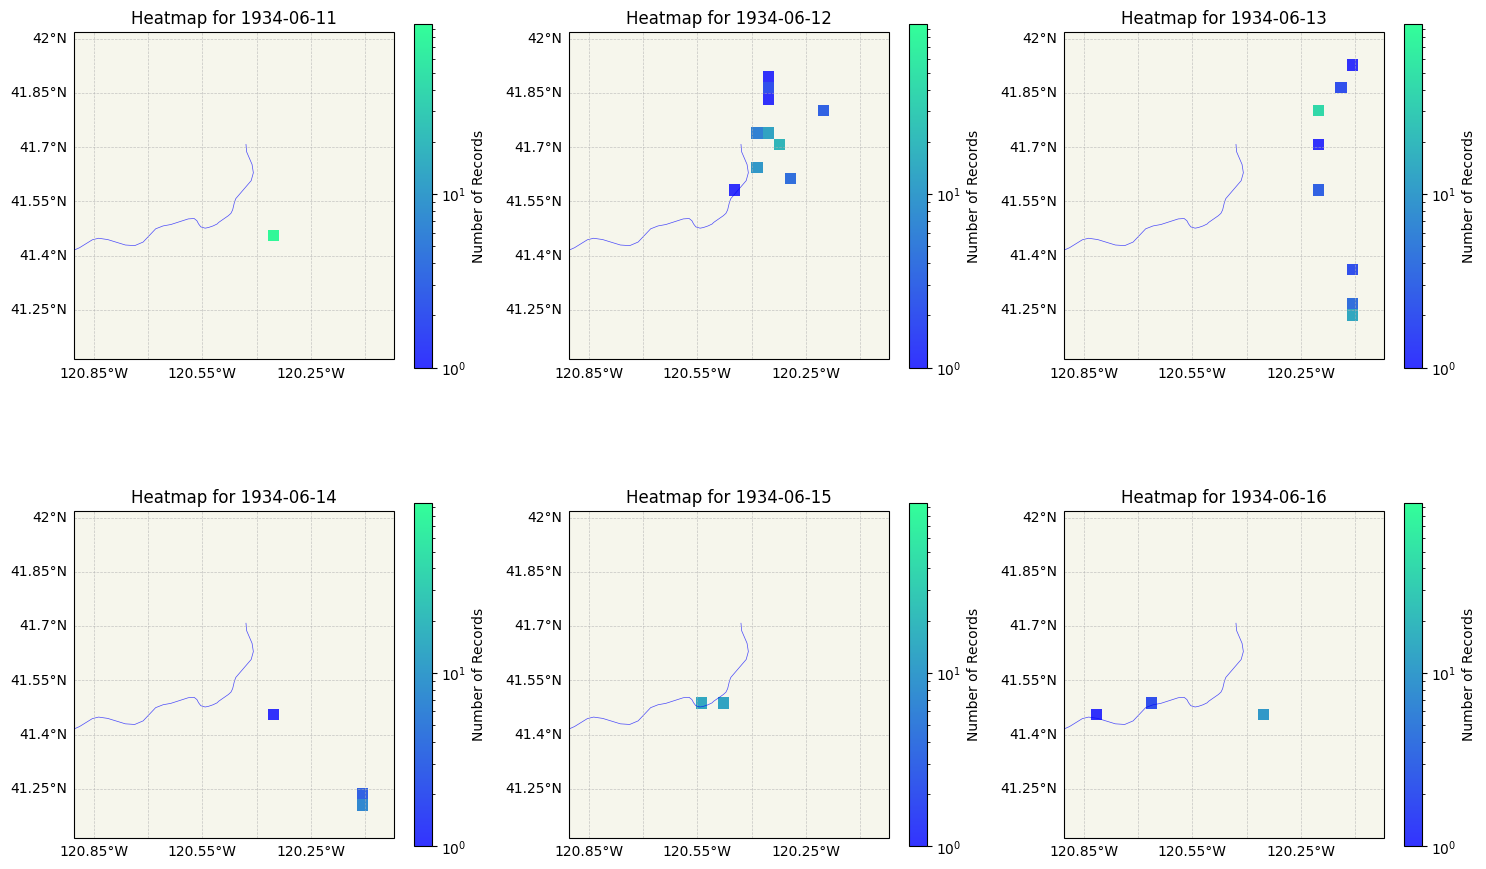

In [50]:
plot_geographical_heatmap_by_day(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',plot_rivers=True, plot_roads=True, grid_size=25)

This is interesting, looks like there's a couple focal points. I wonder if these are base camp areas? 

Maybe there are multiple parties collecting samples in different areas on the same day, and that's why there is overlap.

There are a lot of interesting questions we can ask from this, but overall I would say this consists of a single expedition, and our first cluster! Lets label it in the larger df as cluster == 0

In [51]:
df.loc[group0_df.index, 'cluster'] = '0'
df[df.cluster == '0'].__len__()

/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_28180/1027587913.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[group0_df.index, 'cluster'] = '0'


265

Now lets look at another cluster

### ii.) Cluster 1: 1934-08-01 (single day)

Now lets look at the cluster for the random id we initially pulled

In [52]:
cluster_date_l[3]

('1934-08-01', '1934-08-01')

In [54]:
group1_df = test_df[(pd.to_datetime(cluster_date_l[3][0]) <= test_df['startdate']) & (test_df['startdate'] <= pd.to_datetime(cluster_date_l[3][1]))][['latitude1', 'longitude1', 'remarks', 'localityname', 'startdate', 'enddate']]

group1_df

latitude1  longitude1 remarks                   localityname  \
37495    41.3619   -120.2372     NaN  Pine Creek Basin, Warner Mts.   
45901    41.4543   -120.3276     NaN                  Parker Creek.   
45900    41.4543   -120.3276     NaN                  Parker Creek.   
71594    41.3786   -120.2189     NaN        E slope of Warren Peak.   
37497    41.3619   -120.2372     NaN  Pine Creek Basin, Warner Mts.   
89199    41.3619   -120.2372     NaN  Pine Creek Basin, Warner Mts.   
37498    41.3619   -120.2372     NaN  Pine Creek Basin, Warner Mts.   
37496    41.3619   -120.2372     NaN  Pine Creek Basin, Warner Mts.   

       startdate     enddate  
37495 1934-08-01         NaN  
45901 1934-08-01  1934-08-01  
45900 1934-08-01  1934-08-01  
71594 1934-08-01  1934-08-01  
37497 1934-08-01         NaN  
89199 1934-08-01         NaN  
37498 1934-08-01         NaN  
37496 1934-08-01         NaN

All of the non-null text1 is about shrubs! Good sign for expedition goal

In [55]:
group1_df.localityname.value_counts()


localityname
Pine Creek Basin, Warner Mts.    5
Parker Creek.                    2
E slope of Warren Peak.          1
Name: count, dtype: int64

In [56]:
print('group 1 lats: ', group1_df.latitude1.unique())
print('group 1 longs: ', group1_df.longitude1.unique())
print('group 1 date range: ', group1_df.startdate.min(), group1_df.startdate.max())

group 1 lats:  [41.3619 41.4543 41.3786]
group 1 longs:  [-120.2372 -120.3276 -120.2189]
group 1 date range:  1934-08-01 00:00:00 1934-08-01 00:00:00


/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


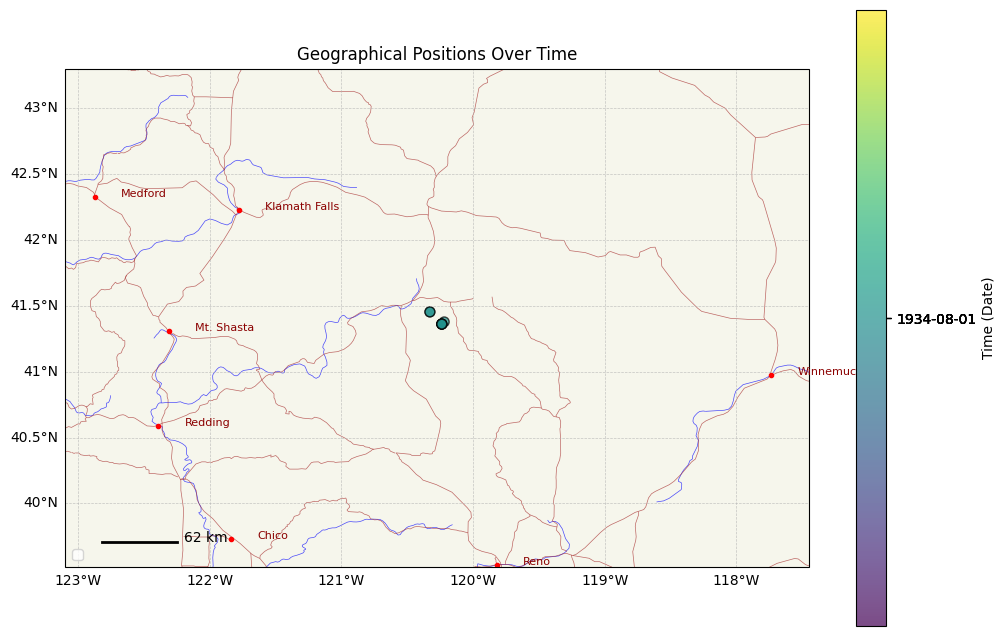

In [57]:
plot_geographical_positions(group1_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=0.05, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


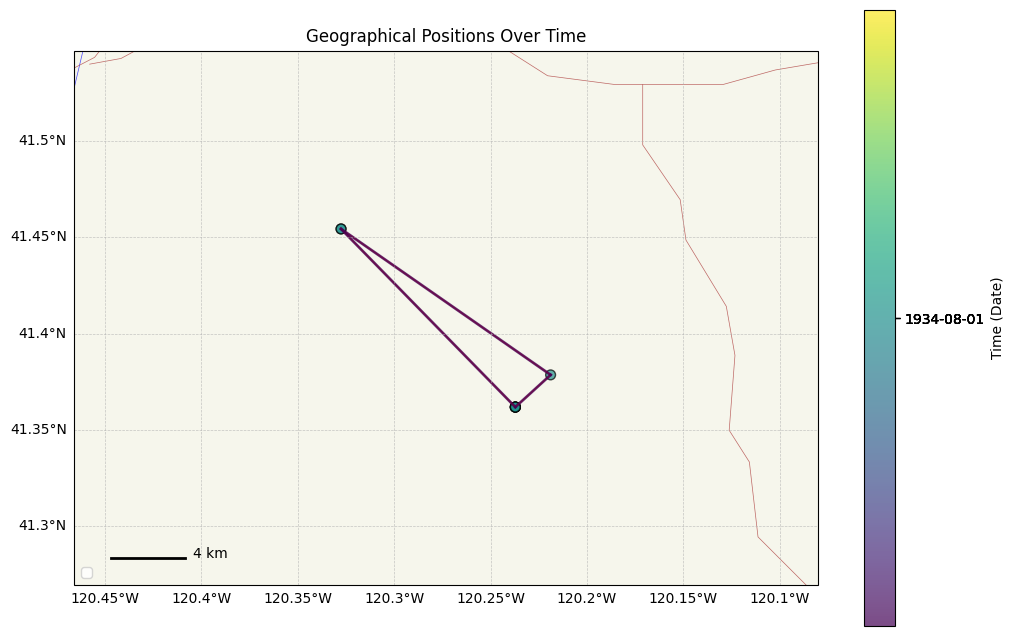

In [58]:
plot_geographical_positions(group1_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate', 
                            zoom=1, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

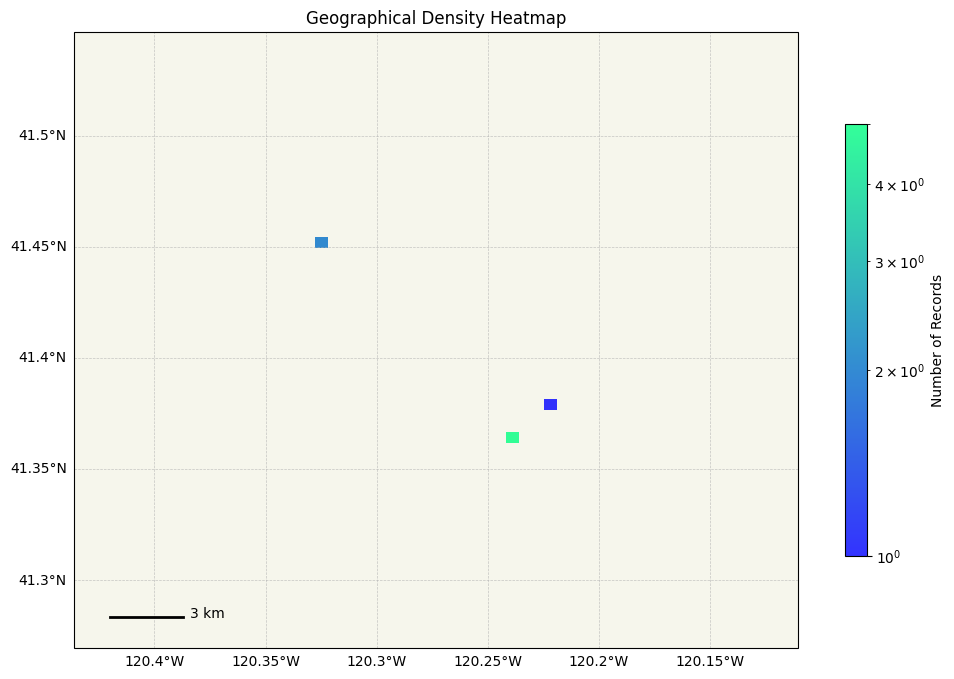

In [59]:
plot_geographical_heatmap(group1_df, lat_col='latitude1', lon_col='longitude1', grid_size=20,
                          zoom=1,  plot_rivers=True, plot_roads=True)

After checking a map - yes they all seem like the same cluster! 

In [188]:
group1_df.text1.value_counts()

text1
Shrub 3-4 m high.    5
Name: count, dtype: int64

Judging from the 72 rows from the entire data parker creek subset with the group 1 cluster date range with 60 day buffer on each side, we didn't miss any records for this cluster!

Let's label these records with cluster id '1'

In [189]:
df.loc[group1_df.index, 'cluster'] = '1'

In [190]:
df[df.cluster == '1'].__len__()

8

In [191]:
df[df.cluster == '1']

collectionobjectid              text1 countamt  collectingeventid  \
17219            104415.0                NaN      1.0            73033.0   
7551              45606.0                NaN      1.0           113186.0   
42037            258210.0                NaN      1.0            73034.0   
46903            287873.0  Shrub 3-4 m high.      1.0            59784.0   
26633            162204.0  Shrub 3-4 m high.      1.0            59783.0   
54105            332002.0  Shrub 3-4 m high.      1.0            59785.0   
46374            284659.0  Shrub 3-4 m high.      1.0           140824.0   
4195              24685.0  Shrub 3-4 m high.      1.0            59782.0   

       startdate     enddate remarks  localityid  minelevation  maxelevation  \
17219 1934-08-01  1934-08-01     NaN     73033.0        5200.0        5200.0   
7551  1934-08-01  1934-08-01     NaN    113186.0           NaN           NaN   
42037 1934-08-01  1934-08-01     NaN     73034.0        5200.0        5200.0   
46903 1934-08-01         NaN     NaN     59784.0        7600.0        7600.0   
26633 1934-08-01         NaN     NaN     59783.0        7600.0        7600.0   
54105 1934-08-01         NaN     NaN     59785.0        7600.0        7600.0   
46374 1934-08-01         NaN     NaN    140824.0        7600.0        7600.0   
4195  1934-08-01         NaN     NaN     59782.0        7600.0        7600.0   

       elevationaccuracy  latitude1  longitude1  \
17219                0.0    41.4543   -120.3276   
7551                 NaN    41.3786   -120.2189   
42037                0.0    41.4543   -120.3276   
46903                0.0    41.3619   -120.2372   
26633                0.0    41.3619   -120.2372   
54105                0.0    41.3619   -120.2372   
46374                0.0    41.3619   -120.2372   
4195                 0.0    41.3619   -120.2372   

                        localityname namedplace  geographyid cluster  
17219                  Parker Creek.        NaN      17158.0       1  
7551         E slope of Warren Peak.        NaN      17158.0       1  
42037                  Parker Creek.        NaN      17158.0       1  
46903  Pine Creek Basin, Warner Mts.        NaN      17158.0       1  
26633  Pine Creek Basin, Warner Mts.        NaN      17158.0       1  
54105  Pine Creek Basin, Warner Mts.        NaN      17158.0       1  
46374  Pine Creek Basin, Warner Mts.        NaN      17158.0       1  
4195   Pine Creek Basin, Warner Mts.        NaN      17158.0       1

### iii.) Cluster 2: 1934-07-13 (single record!)

Now lets look at the cluster for a single record. 

In [61]:
cluster_date_l[2]

('1934-07-13', '1934-07-13')

In [63]:
group2_df = test_df[(pd.to_datetime(cluster_date_l[2][0]) <= test_df['startdate']) & (test_df['startdate'] <= pd.to_datetime(cluster_date_l[2][1]))][['latitude1', 'longitude1', 'remarks', 'localityname', 'startdate', 'enddate']]

group2_df

latitude1  longitude1 remarks             localityname  startdate  \
86391    41.2323   -120.0991     NaN  N fork of Barber Creek. 1934-07-13   

          enddate  
86391  1934-07-13

All of the non-null text1 is about shrubs! Good sign for expedition goal

In [64]:
group2_df.localityname.value_counts()


localityname
N fork of Barber Creek.    1
Name: count, dtype: int64

In [65]:
print('group 2 lats: ', group2_df.latitude1.unique())
print('group 2 longs: ', group2_df.longitude1.unique())
print('group 2 date range: ', group2_df.startdate.min(), group2_df.startdate.max())

group 2 lats:  [41.2323]
group 2 longs:  [-120.0991]
group 2 date range:  1934-07-13 00:00:00 1934-07-13 00:00:00


/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


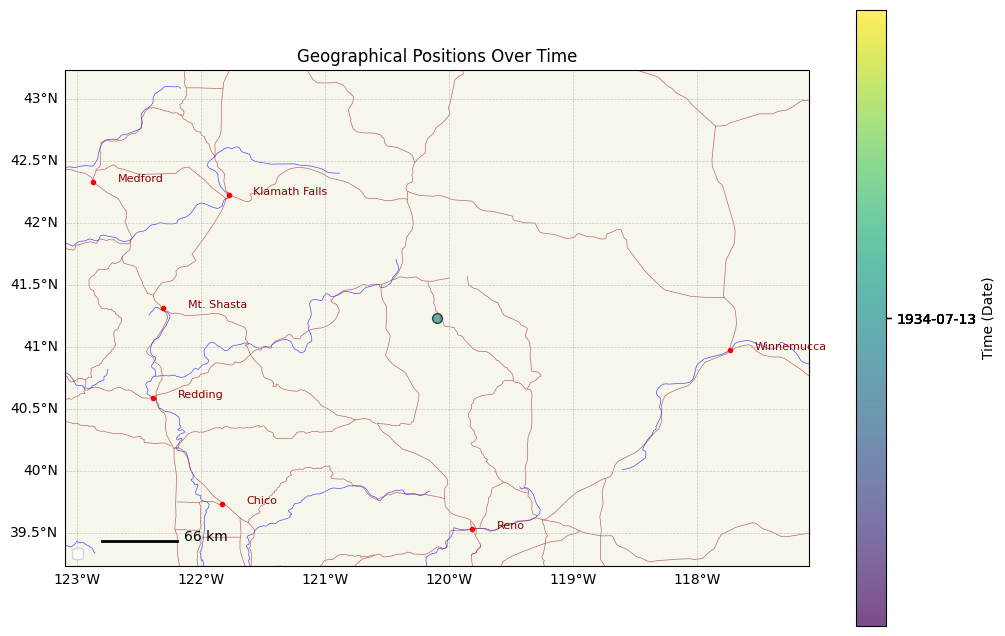

In [66]:
plot_geographical_positions(group2_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=.05, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


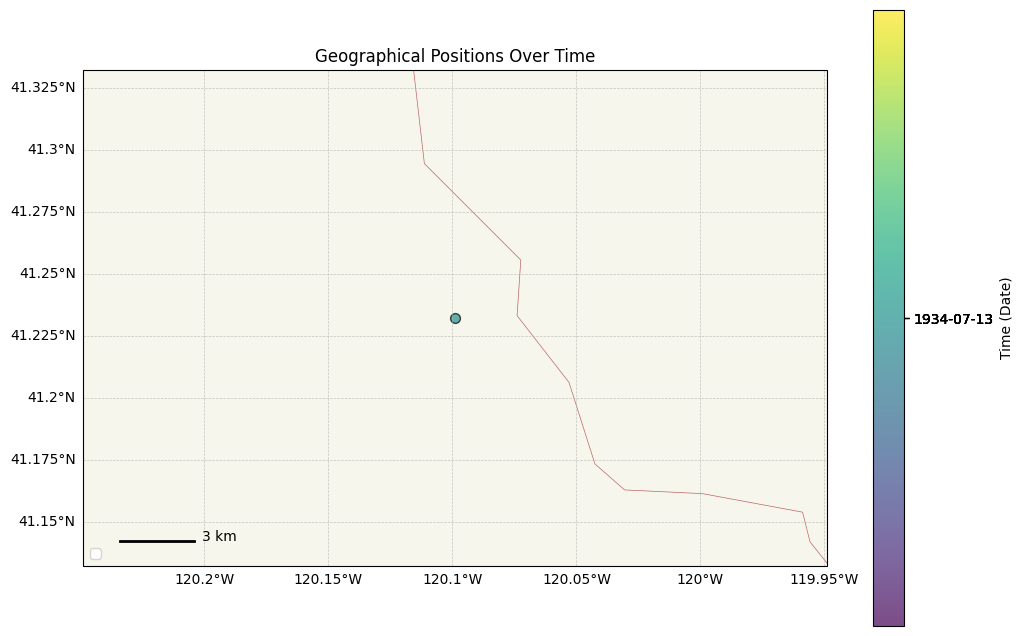

In [67]:
plot_geographical_positions(group2_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate', 
                            zoom=1, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

In [68]:
df.loc[group2_df.index, 'cluster'] = '2'

In [69]:
df[df.cluster == '2']

collectingeventid  startdate     enddate remarks  localityid  \
86391             136411 1934-07-13  1934-07-13     NaN    136411.0   

       minelevation  maxelevation  elevationaccuracy  latitude1  longitude1  \
86391        6000.0        6000.0                0.0    41.2323   -120.0991   

                  localityname namedplace  geographyid  centroidlat  \
86391  N fork of Barber Creek.        NaN      17158.0        41.57   

       centroidlon commonname                                 fullname  \
86391       -100.0        NaN  Modoc County, California, United States   

               name  spatial_flag cluster  
86391  Modoc County             1       2

## b.) Collection Object ID: 232746

In [120]:
samp_colleventid_l[1]

232746

In [121]:
samp_record = df[df.collectingeventid == samp_colleventid_l[1]]
samp_record

collectingeventid  startdate enddate  \
147968             232746 2004-10-22     NaN   

                                                  remarks  localityid  \
147968  Steep valley slope along river bank with limes...    232746.0   

        minelevation  maxelevation  elevationaccuracy  latitude1  longitude1  \
147968        1700.0           NaN                NaN  28.033611   98.600833   

                                             localityname namedplace  \
147968  West bank of Nu Jiang (Salween River) at Stone...        NaN   

        geographyid  centroidlat  centroidlon commonname  \
147968      33267.0          NaN          NaN        NaN   

                                                 fullname                name  \
147968  Bingzhongluo Xiang, Gongshan Autonomous County...  Bingzhongluo Xiang   

        spatial_flag cluster  
147968             1       3

In [122]:
samp_record_lat = samp_record.latitude1.values[0]
samp_record_lon = samp_record.longitude1.values[0]
samp_record_startdate = samp_record.startdate.values[0]
print('lat:', samp_record_lat, '    lon:', samp_record_lon, '    start date:', samp_record_startdate)

lat: 28.0336111111     lon: 98.6008333333     start date: 2004-10-22T00:00:00.000000000


In [85]:
# Filter overall df to only records within 0.5º lat of the sample lat
test_df = df[abs(df.latitude1 - samp_record_lat) < 0.5].sort_values(by='startdate')

# Filter overall df to only records within 0.5º lon of the sample lon
test_df = test_df[abs(test_df.longitude1 - samp_record_lon) < 0.5].sort_values(by='startdate')

# Filter overall df to only records within 6 months of the sample startdate
test_df = test_df[test_df['startdate'].between(samp_record_startdate - pd.DateOffset(months=6), samp_record_startdate + pd.DateOffset(months=6))]


In [95]:
len(test_df)

2622

In [87]:
test_df.startdate.value_counts()

startdate
2004-10-30    268
2004-10-31    239
2004-10-29    233
2004-10-28    226
2004-10-27    211
2004-11-11    160
2004-11-13    152
2004-11-09    150
2004-11-12    132
2004-11-01    127
2004-11-03    120
2004-11-14    103
2004-11-02    103
2004-11-10     98
2004-10-26     69
2004-11-07     59
2004-11-04     52
2004-11-05     38
2004-10-25     27
2004-10-22     16
2004-11-08     14
2004-10-23     12
2004-10-24      8
2004-11-06      5
Name: count, dtype: int64

In [88]:
test_df.localityname.value_counts()

localityname
About 0.6 km NW of Meiliwang on the trail between Bapo and Xixiaofang on the trail from Bapo to Gongshan via Qiqi on                    122
N of Nengpula on the W side of the Dulong Jiang and to the N of Hongxin Qiao (Red Star bridge) ca. 0.3 km SW of Bapo.                   118
E side of Gaoligong Shan on the road from Gongshan to Kongdang.                                                                          83
E side of Gaoligong Shan on the road from Danzhu to the Myanmar border.                                                                  78
Along the Gamolai He ca. 3 km S of Bapo on the E side of the Dulong Jiang.                                                               77
                                                                                                                                       ... 
E side of the Dulong Jiang ca. 2 km S of Bailai village, ca. 8.5 direct km S of Dizhengdang (Lengdang) and ca. 14                         1
Gongsha

Okay, now there's a little more variation in localityname. 

There's still the Parker Creek group, but now there's also Alturas/Dorris, and Canby groups. Do we think these are part of the same cluster?

In [89]:
test_df.startdate.sort_values().unique()

<DatetimeArray>
['2004-10-22 00:00:00', '2004-10-23 00:00:00', '2004-10-24 00:00:00',
 '2004-10-25 00:00:00', '2004-10-26 00:00:00', '2004-10-27 00:00:00',
 '2004-10-28 00:00:00', '2004-10-29 00:00:00', '2004-10-30 00:00:00',
 '2004-10-31 00:00:00', '2004-11-01 00:00:00', '2004-11-02 00:00:00',
 '2004-11-03 00:00:00', '2004-11-04 00:00:00', '2004-11-05 00:00:00',
 '2004-11-06 00:00:00', '2004-11-07 00:00:00', '2004-11-08 00:00:00',
 '2004-11-09 00:00:00', '2004-11-10 00:00:00', '2004-11-11 00:00:00',
 '2004-11-12 00:00:00', '2004-11-13 00:00:00', '2004-11-14 00:00:00']
Length: 24, dtype: datetime64[ns]

This all looks like one big cluster! Let's plot it to get a sense of what we're looking at first...

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


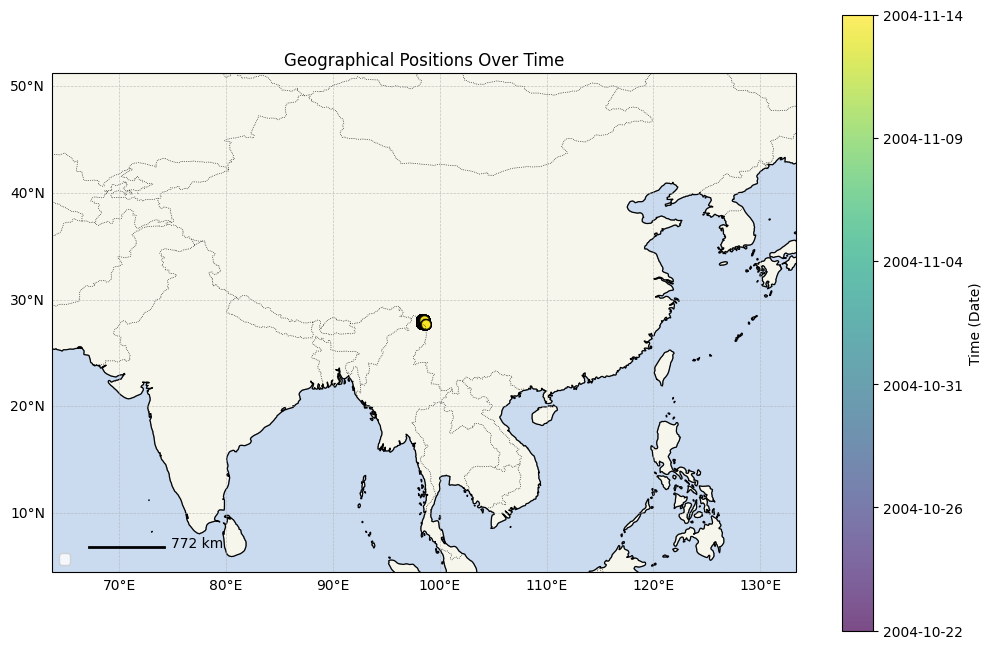

In [90]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=0.02, cluster_line=False)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


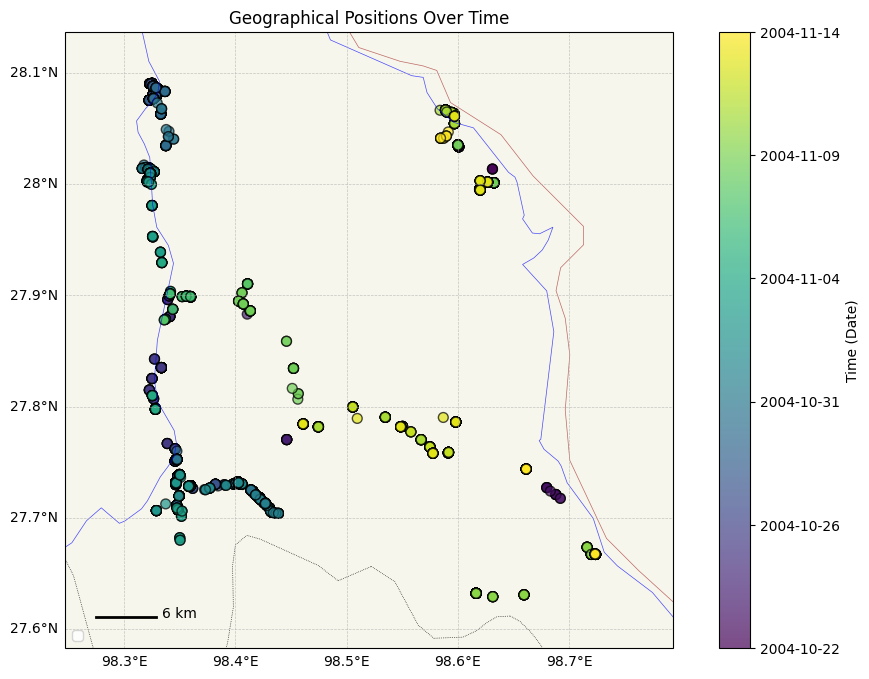

In [91]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom='auto', cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


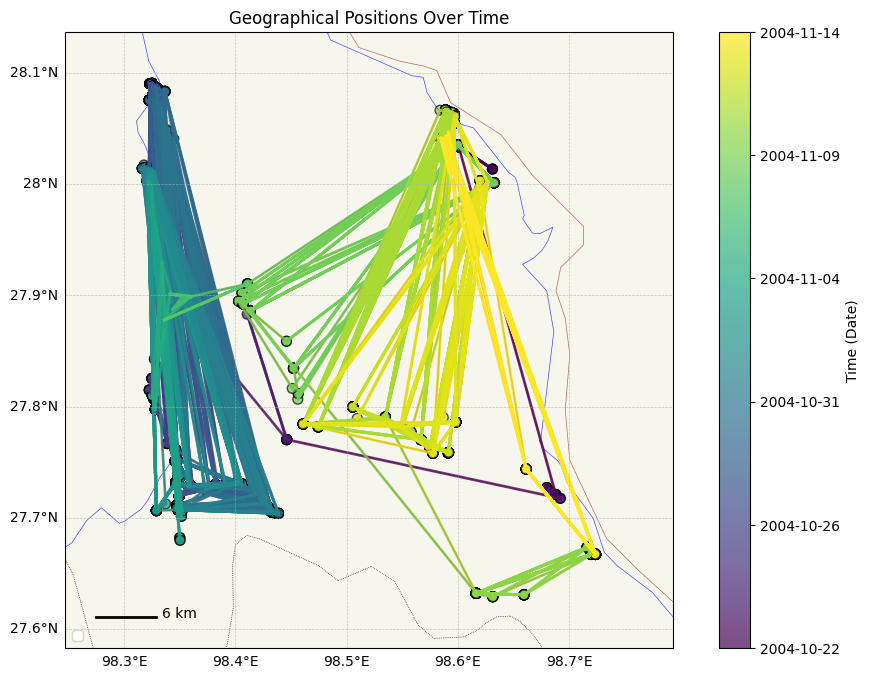

In [92]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom='auto', cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

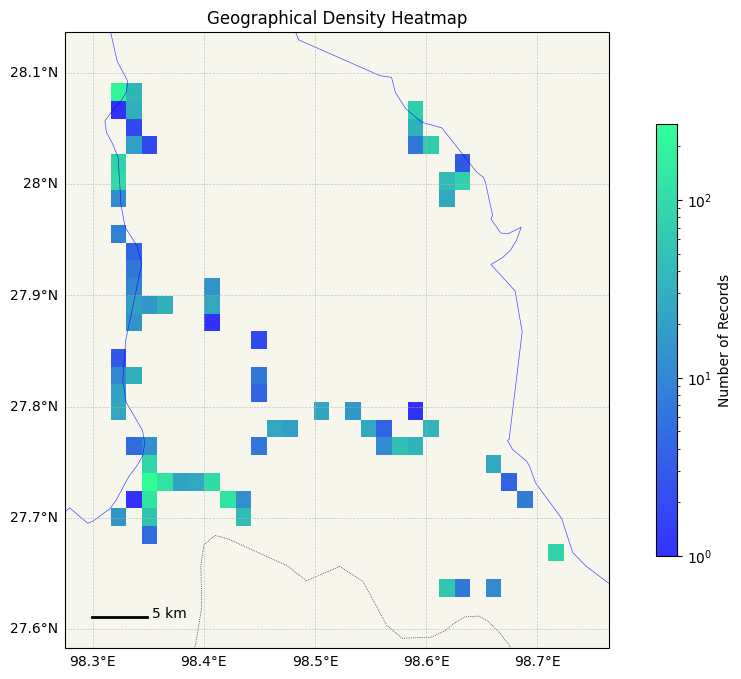

In [93]:
plot_geographical_heatmap(test_df, lat_col='latitude1', lon_col='longitude1', grid_size=30,
                          zoom='auto',  plot_rivers=True, plot_roads=True)


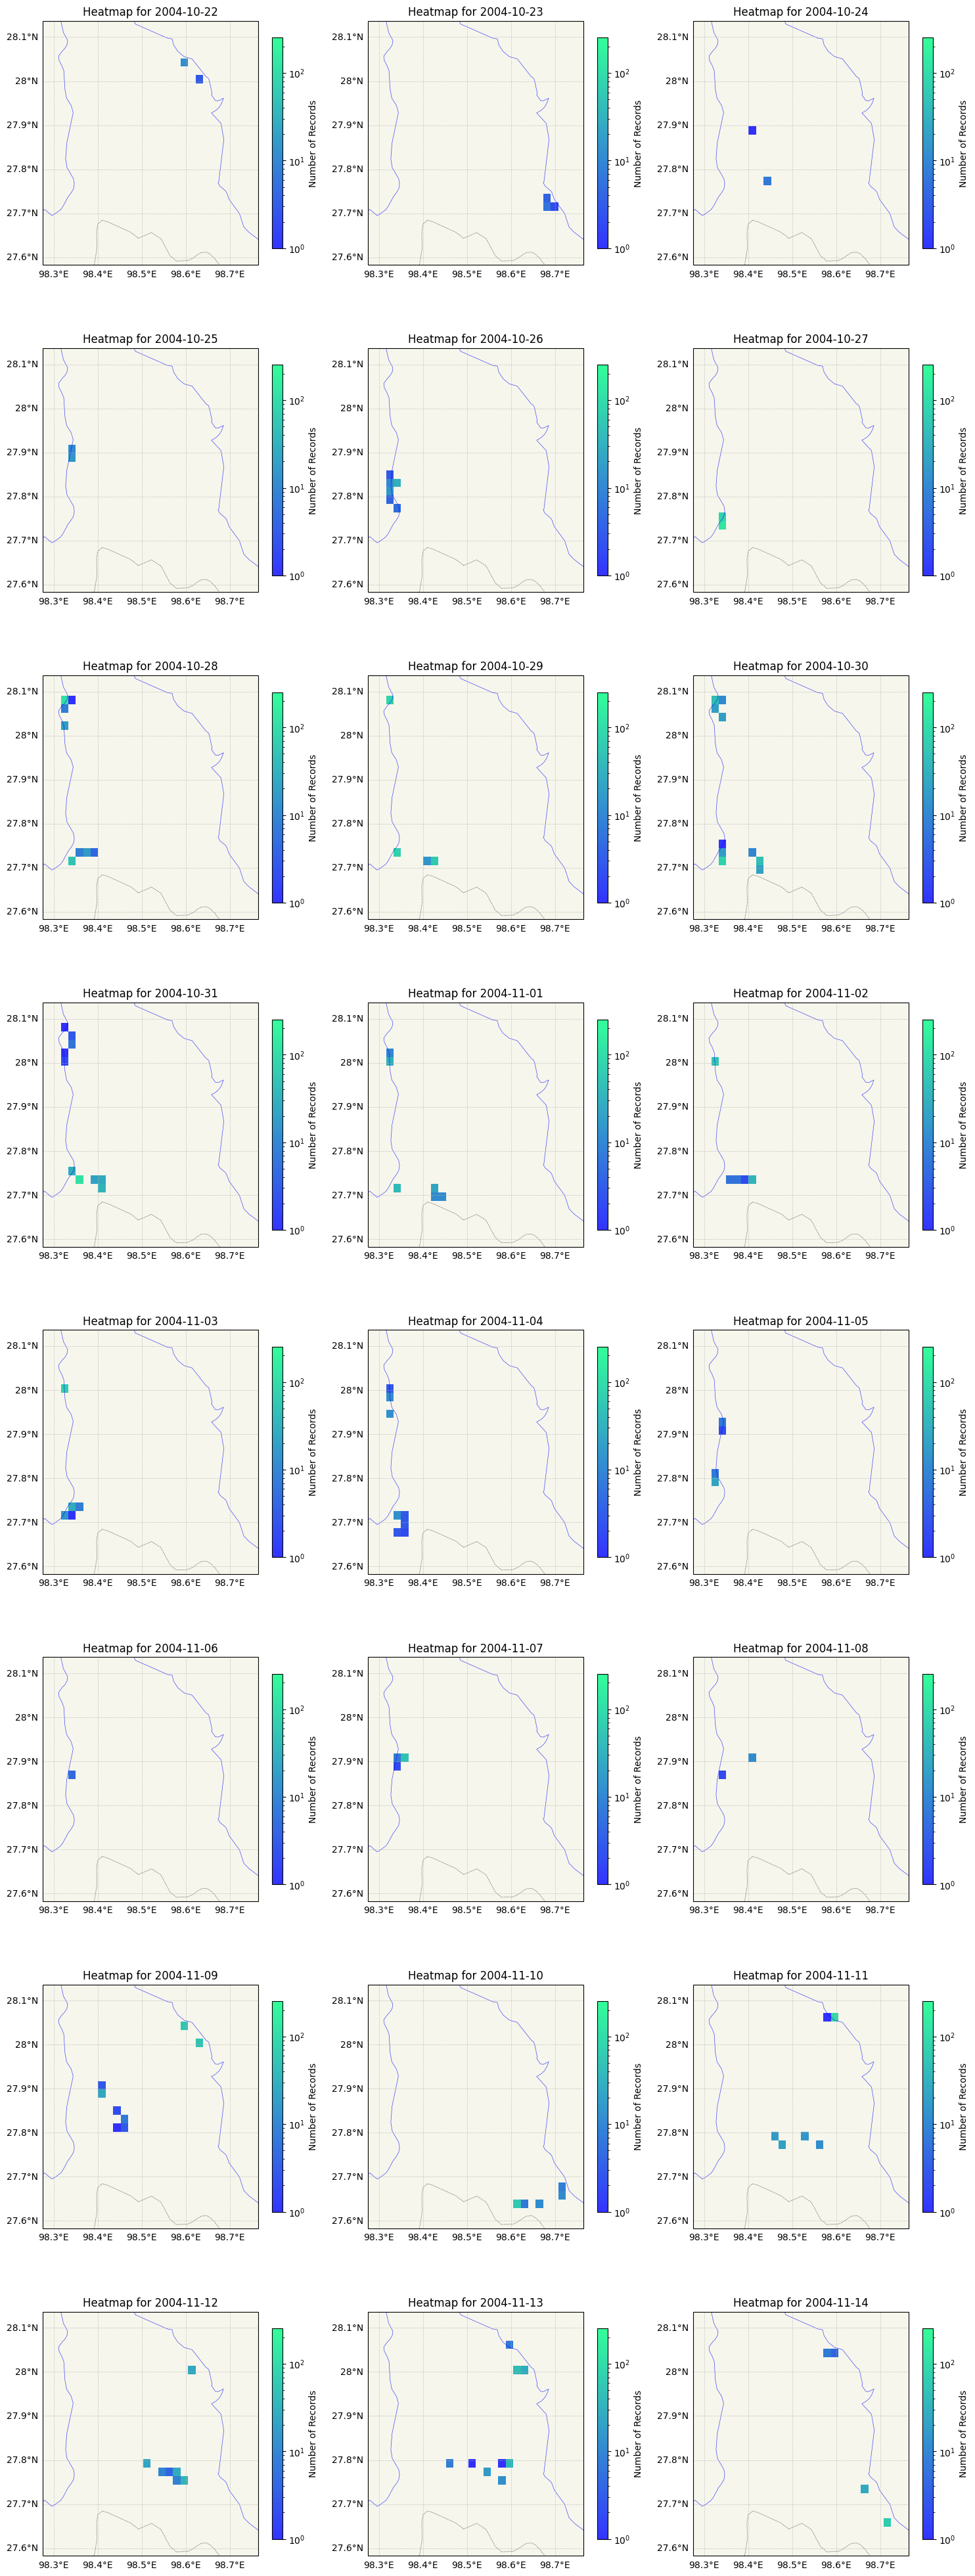

In [94]:
plot_geographical_heatmap_by_day(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',plot_rivers=True, plot_roads=True, grid_size=25)

2622 records - lets check it out as our first cluster

In [96]:
test_df.startdate.min()

Timestamp('2004-10-22 00:00:00')

### i.) Cluster 3: ('1998-10-20', '1998-11-08')

In [97]:
group0_df = test_df

group0_df

collectingeventid  startdate     enddate  \
147959             232737 2004-10-22         NaN   
147966             232744 2004-10-22         NaN   
147967             232745 2004-10-22         NaN   
147957             232735 2004-10-22         NaN   
147865             232643 2004-10-22         NaN   
...                   ...        ...         ...   
50817               80705 2004-11-14         NaN   
66893              105776 2004-11-14         NaN   
113054             178307 2004-11-14         NaN   
42336               67350 2004-11-14  2004-11-14   
123503             194648 2004-11-14         NaN   

                                                  remarks  localityid  \
147959  Steep valley slope along river bank with limes...    232737.0   
147966  Steep valley slope along river bank with limes...    232744.0   
147967  Steep valley slope along river bank with limes...    232745.0   
147957  Steep valley slope along river bank with limes...    232735.0   
147865  Steep valley slope with open Pinus woodland an...    232643.0   
...                                                   ...         ...   
50817             Disturbed thicket and secondary forest.     80705.0   
66893   Disturbed thicket and secondary forest with pl...    105776.0   
113054            Disturbed thicket and secondary forest.    178307.0   
42336   Disturbed thicket and secondary forest with pl...     67350.0   
123503            Disturbed thicket and secondary forest.    194648.0   

        minelevation  maxelevation  elevationaccuracy  latitude1  longitude1  \
147959        1700.0           NaN                NaN  28.033611   98.600833   
147966        1700.0           NaN                NaN  28.033611   98.600833   
147967        1700.0           NaN                NaN  28.033611   98.600833   
147957        1700.0           NaN                NaN  28.033611   98.600833   
147865        1725.0           NaN                NaN  28.013611   98.631111   
...              ...           ...                ...        ...         ...   
50817         1410.0           NaN                NaN  27.667419   98.723419   
66893         1640.0           NaN                NaN  27.743885   98.661392   
113054        1430.0           NaN                NaN  27.667114   98.723778   
42336         1640.0        1640.0                0.0  27.743889   98.661389   
123503        1410.0           NaN                NaN  27.667419   98.723419   

        ... namedplace geographyid  centroidlat  centroidlon  commonname  \
147959  ...        NaN     33267.0          NaN          NaN         NaN   
147966  ...        NaN     33267.0          NaN          NaN         NaN   
147967  ...        NaN     33267.0          NaN          NaN         NaN   
147957  ...        NaN     33267.0          NaN          NaN         NaN   
147865  ...        NaN     33267.0          NaN          NaN         NaN   
...     ...        ...         ...          ...          ...         ...   
50817   ...        NaN     33269.0          NaN          NaN         NaN   
66893   ...        NaN     33269.0          NaN          NaN         NaN   
113054  ...        NaN     33269.0          NaN          NaN         NaN   
42336   ...        NaN     33269.0          NaN          NaN         NaN   
123503  ...        NaN     33269.0          NaN          NaN         NaN   

                                                 fullname                name  \
147959  Bingzhongluo Xiang, Gongshan Autonomous County...  Bingzhongluo Xiang   
147966  Bingzhongluo Xiang, Gongshan Autonomous County...  Bingzhongluo Xiang   
147967  Bingzhongluo Xiang, Gongshan Autonomous County...  Bingzhongluo Xiang   
147957  Bingzhongluo Xiang, Gongshan Autonomous County...  Bingzhongluo Xiang   
147865  Bingzhongluo Xiang, Gongshan Autonomous County...  Bingzhongluo Xiang   
...                                                   ...                 ...   
50817   Cikai Zheng, Gongshan Autonomous County, Yunna...        

In [99]:
group0_df.localityname.value_counts()

localityname
About 0.6 km NW of Meiliwang on the trail between Bapo and Xixiaofang on the trail from Bapo to Gongshan via Qiqi on                    122
N of Nengpula on the W side of the Dulong Jiang and to the N of Hongxin Qiao (Red Star bridge) ca. 0.3 km SW of Bapo.                   118
E side of Gaoligong Shan on the road from Gongshan to Kongdang.                                                                          83
E side of Gaoligong Shan on the road from Danzhu to the Myanmar border.                                                                  78
Along the Gamolai He ca. 3 km S of Bapo on the E side of the Dulong Jiang.                                                               77
                                                                                                                                       ... 
E side of the Dulong Jiang ca. 2 km S of Bailai village, ca. 8.5 direct km S of Dizhengdang (Lengdang) and ca. 14                         1
Gongsha

This is interesting, looks like there's a couple focal points. I wonder if these are base camp areas? 

Maybe there are multiple parties collecting samples in different areas on the same day, and that's why there is overlap.

There are a lot of interesting questions we can ask from this, but overall I would say this consists of a single expedition, and our first cluster! Lets label it in the larger df as cluster == 0

In [100]:
df.loc[group0_df.index, 'cluster'] = '3'
df[df.cluster == '3'].__len__()

2622

## c.) Collection Object ID: 57595

In [123]:
samp_colleventid_l[2]

57595

In [127]:
samp_record = df[df.collectingeventid == 109731]
samp_record

collectingeventid  startdate     enddate  \
69352             109731 2006-08-20  2006-08-20   

                                                 remarks  localityid  \
69352  Secondary substropical evergreen broadleaf for...    109731.0   

       minelevation  maxelevation  elevationaccuracy  latitude1  longitude1  \
69352        1700.0        1700.0                0.0  27.974167      98.655   

                                            localityname  \
69352  Vicinity of Xiaochala, ca. 1 km NW of the mout...   

                                              namedplace  geographyid  \
69352  Vicinity of Xiaochala, ca. 1 km NW of the mout...      33268.0   

       centroidlat  centroidlon commonname  \
69352          NaN          NaN        NaN   

                                                fullname                name  \
69352  Bingzhongluo Xiang, Gongshan Autonomous County...  Bingzhongluo Xiang   

       spatial_flag cluster  
69352             1     NaN

In [128]:
samp_record_lat = samp_record.latitude1.values[0]
samp_record_lon = samp_record.longitude1.values[0]
samp_record_startdate = samp_record.startdate.values[0]
print('lat:', samp_record_lat, '    lon:', samp_record_lon, '    start date:', samp_record_startdate)

lat: 27.9741666667     lon: 98.655     start date: 2006-08-20T00:00:00.000000000


In [129]:
# Filter overall df to only records within 0.5º lat of the sample lat
test_df = df[abs(df.latitude1 - samp_record_lat) < 0.5].sort_values(by='startdate')

# Filter overall df to only records within 0.5º lon of the sample lon
test_df = test_df[abs(test_df.longitude1 - samp_record_lon) < 0.5].sort_values(by='startdate')

# Filter overall df to only records within 6 months of the sample startdate
test_df = test_df[test_df['startdate'].between(samp_record_startdate - pd.DateOffset(months=6), samp_record_startdate + pd.DateOffset(months=6))]


In [130]:
test_df

collectingeventid  startdate enddate  \
115182             181608 2006-07-28     NaN   
144791             228278 2006-07-28     NaN   
42720               67969 2006-07-28     NaN   
32961               52708 2006-07-28     NaN   
142565             224789 2006-07-28     NaN   
...                   ...        ...     ...   
149884             234663 2006-09-05     NaN   
149883             234662 2006-09-05     NaN   
149887             234666 2006-09-05     NaN   
149882             234661 2006-09-05     NaN   
149888             234667 2006-09-05     NaN   

                                                  remarks  localityid  \
115182  Sclerophyllous evergreen broadleaf forest, dis...    181608.0   
144791  Sclerophyllous evergreen broadleaf forest, dis...    228278.0   
42720   Sclerophyllous evergreen broadleaf forest, dis...     67969.0   
32961   Sclerophyllous evergreen broadleaf forest, dis...     52708.0   
142565  Sclerophyllous evergreen broadleaf forest, dis...    224789.0   
...                                                   ...         ...   
149884  Large valley with mixed evergreen broad-leaved...    234663.0   
149883  Large valley with mixed evergreen broad-leaved...    234662.0   
149887  Large valley with mixed evergreen broad-leaved...    234666.0   
149882  Large valley with mixed evergreen broad-leaved...    234661.0   
149888  Tsuga/ Quercus forest on steep valley slope, a...    234667.0   

        minelevation  maxelevation  elevationaccuracy  latitude1  longitude1  \
115182        1550.0           NaN                NaN  27.907110   98.659195   
144791        1490.0           NaN                NaN  28.033497   98.601135   
42720         1550.0           NaN                NaN  27.907110   98.659195   
32961         1490.0           NaN                NaN  28.033497   98.601135   
142565        1550.0           NaN                NaN  27.907110   98.659195   
...              ...           ...                ...        ...         ...   
149884        2104.0           NaN                NaN  27.906722   98.405222   
149883        2104.0           NaN                NaN  27.906722   98.405222   
149887        2104.0           NaN                NaN  27.906722   98.405222   
149882        2104.0           NaN                NaN  27.906722   98.405222   
149888        2692.0           NaN                NaN  27.847889   98.456722   

                                             localityname  \
115182  Vicinity of Junindang Cun, ca. 26 km by road (...   
144791  Vicinity of Zilijia Cun, near Shimen Guan (Sto...   
42720   Vicinity of Junindang Cun, ca. 26 km by road (...   
32961   Vicinity of Zilijia Cun, near Shimen Guan (Sto...   
142565  Vicinity of Junindang Cun, ca. 26 km by road (...   
...                                                   ...   
149884  West slope of Gaoligong Shan, Irrawaddy catchm...   
149883  West slope of Gaoligong Shan, Irrawaddy catchm...   
149887  West slope of Gaoligong Shan, Irrawaddy catchm...   
149882  West slope of Gaoligong Shan, Irrawaddy catchm...   
149888  West slope of Gaoligong Shan, Irrawaddy catchm...   

                                               namedplace  geographyid  \
115182  Vicinity of Junindang Cun, ca. 26 km by road (...      33274.0   
144791                                                NaN      33268.0   
42720   Vicinity of Junindang Cun, ca. 26 km by road (...      33274.0   
32961                                                 NaN      33268.0   
142565  Vicinity of Junindang Cun, ca. 26 km by road (...      33274.0   
...                                                   ...          ...   
149884                                                NaN      33271.0   
149883                                                NaN      33271.0   
149887                                                NaN      33271.0   
149882                                                NaN      33271.0   
149888                                        

In [131]:
test_df.startdate.value_counts()

startdate
2006-08-18    368
2006-09-01    303
2006-08-29    284
2006-08-12    266
2006-08-17    246
2006-08-20    238
2006-08-21    237
2006-08-19    234
2006-08-13    224
2006-08-28    203
2006-08-30    146
2006-08-24    130
2006-08-23    124
2006-08-14    120
2006-08-31    108
2006-08-16     98
2006-08-11     97
2006-09-02     92
2006-08-25     77
2006-08-26     71
2006-08-22     69
2006-08-27     53
2006-09-03     42
2006-09-05      8
2006-07-28      5
2006-08-15      3
Name: count, dtype: int64

In [132]:
test_df.localityname.value_counts()

localityname
Vicinity of Danghatu near Km 49 on the road from Gongshan to Kongdang and ca. 20.4 direct km WNW of Gongshan on the E                                       123
Vicinity of Heiwadi Qiao on the road from Gongshan to Kongdang, ca. 9.5 direct km NW of Gongshan on the E side of                                           105
Vicinity of Cikeluo Qiao near Km 41 on the road from Gongshan to Kongdang and ca. 16.8 direct km WNW of Gongshan on the                                      99
About 1.2 direct km by SSE of the Heipa Pass tunnel on the new road from Gongshan to the Dulong Jiang valley, E side of                                      93
Near Yipsaka Lake, 2.1 direct km by SSE of the Heipa Pass tunnel on the new road from Gongshan to the Dulong Jiang                                           78
                                                                                                                                                           ... 
Danzhu Cun, in the vicinity

Okay, now there's a little more variation in localityname. 

There's still the Parker Creek group, but now there's also Alturas/Dorris, and Canby groups. Do we think these are part of the same cluster?

In [133]:
test_df.startdate.sort_values().unique()

<DatetimeArray>
['2006-07-28 00:00:00', '2006-08-11 00:00:00', '2006-08-12 00:00:00',
 '2006-08-13 00:00:00', '2006-08-14 00:00:00', '2006-08-15 00:00:00',
 '2006-08-16 00:00:00', '2006-08-17 00:00:00', '2006-08-18 00:00:00',
 '2006-08-19 00:00:00', '2006-08-20 00:00:00', '2006-08-21 00:00:00',
 '2006-08-22 00:00:00', '2006-08-23 00:00:00', '2006-08-24 00:00:00',
 '2006-08-25 00:00:00', '2006-08-26 00:00:00', '2006-08-27 00:00:00',
 '2006-08-28 00:00:00', '2006-08-29 00:00:00', '2006-08-30 00:00:00',
 '2006-08-31 00:00:00', '2006-09-01 00:00:00', '2006-09-02 00:00:00',
 '2006-09-03 00:00:00', '2006-09-05 00:00:00']
Length: 26, dtype: datetime64[ns]

This all looks like one big cluster! Let's plot it to get a sense of what we're looking at first...

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


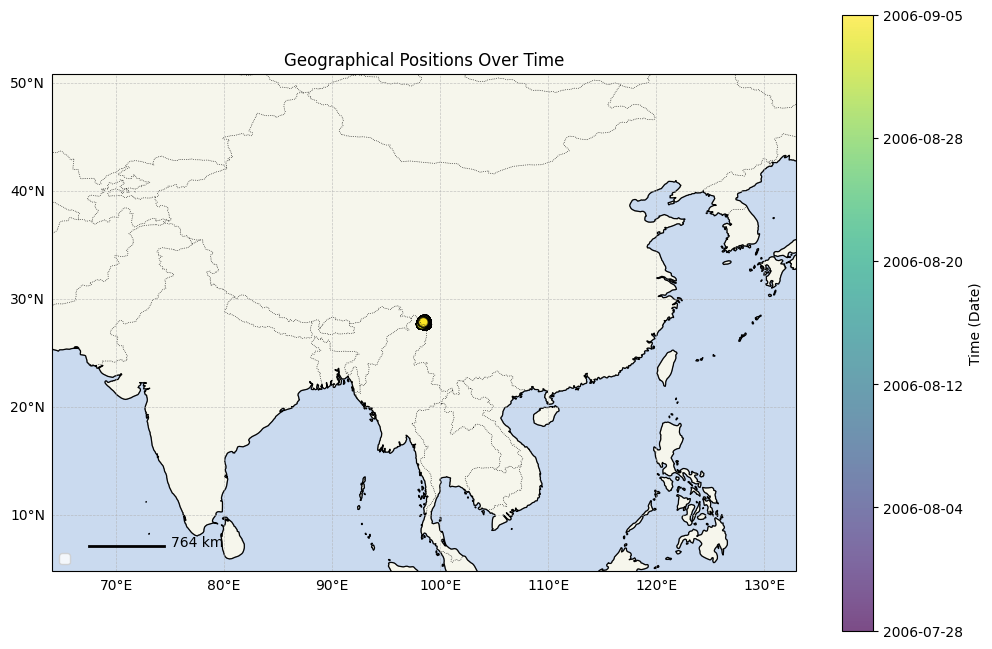

In [134]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=0.02, cluster_line=False)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


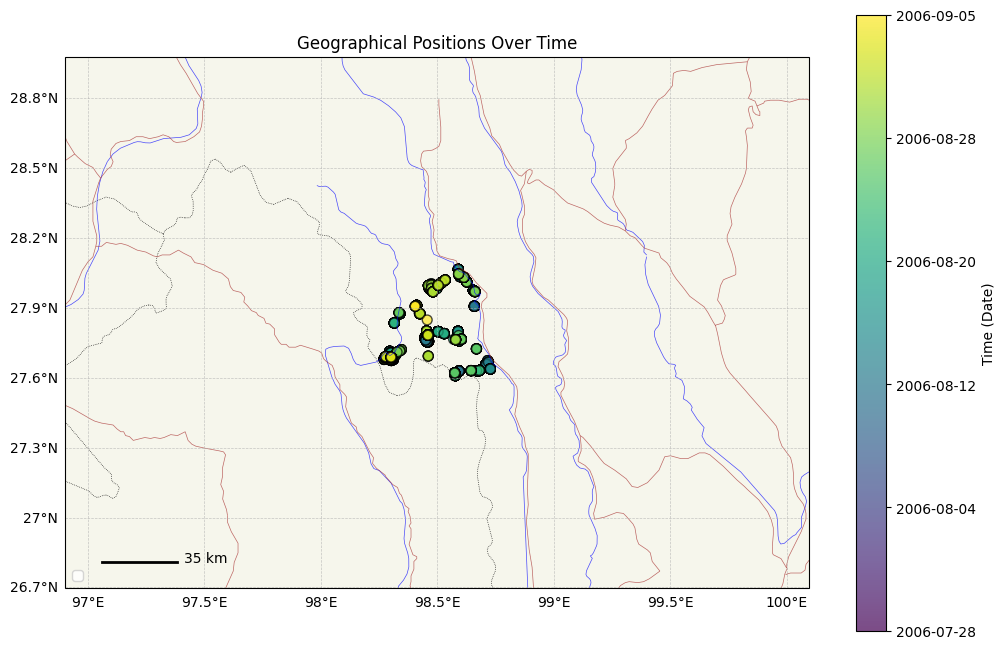

In [135]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=0.5, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


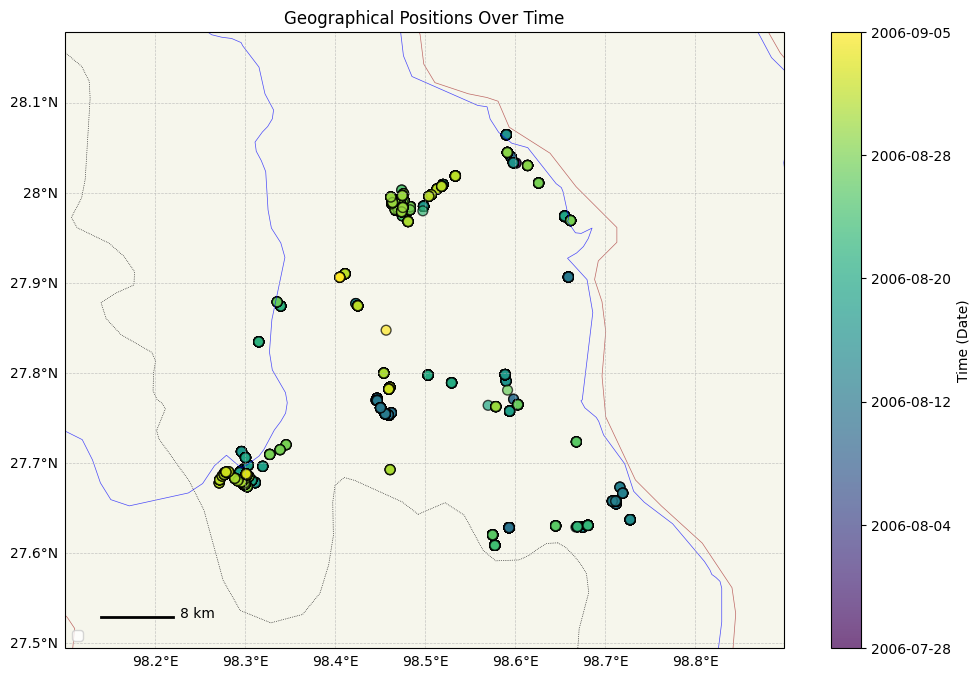

In [136]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=4, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


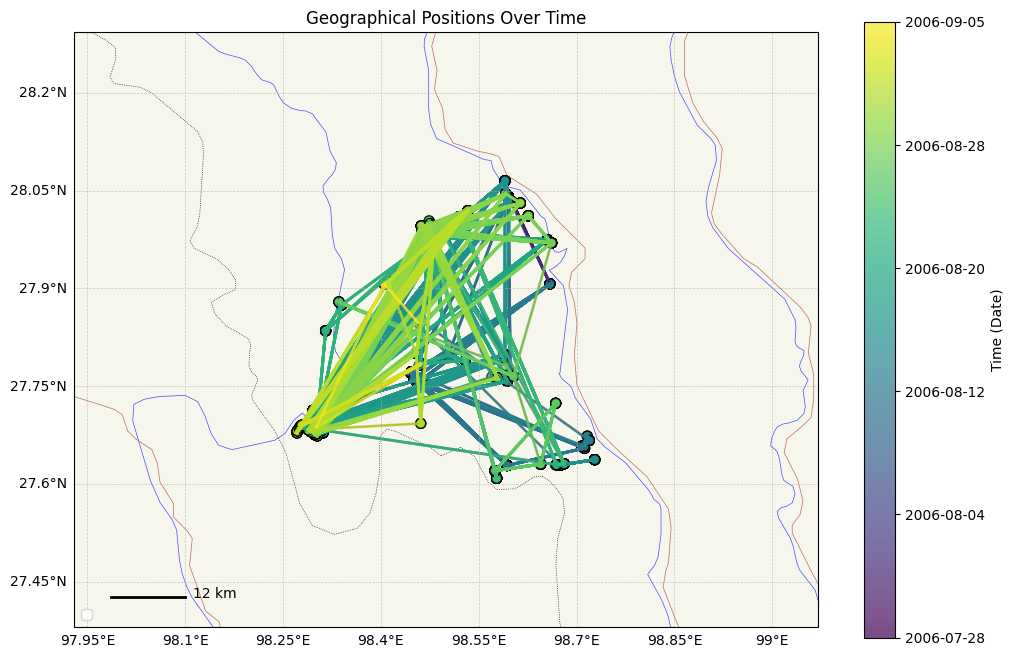

In [137]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=2, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

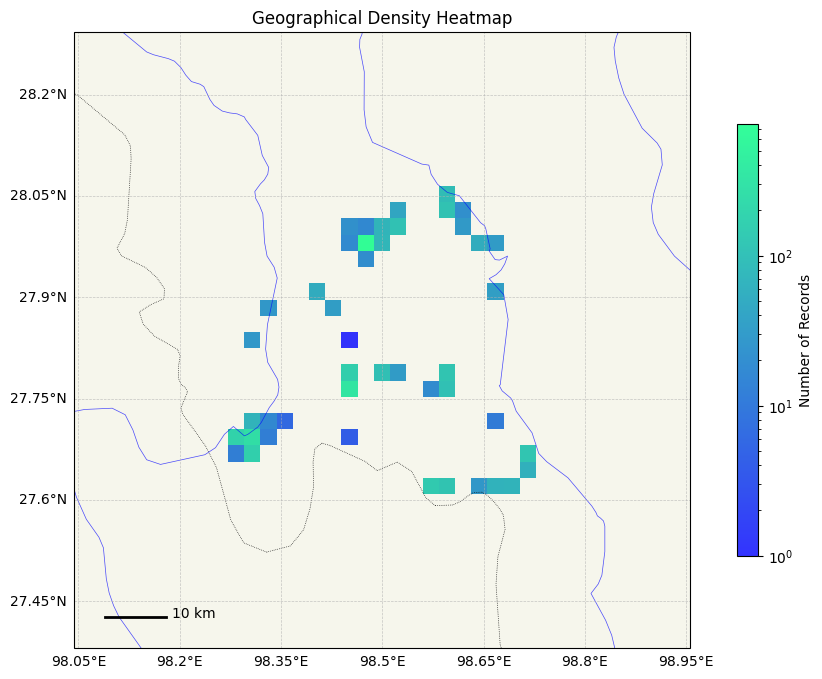

In [138]:
plot_geographical_heatmap(test_df, lat_col='latitude1', lon_col='longitude1', grid_size=20,
                          zoom=2,  plot_rivers=True, plot_roads=True)


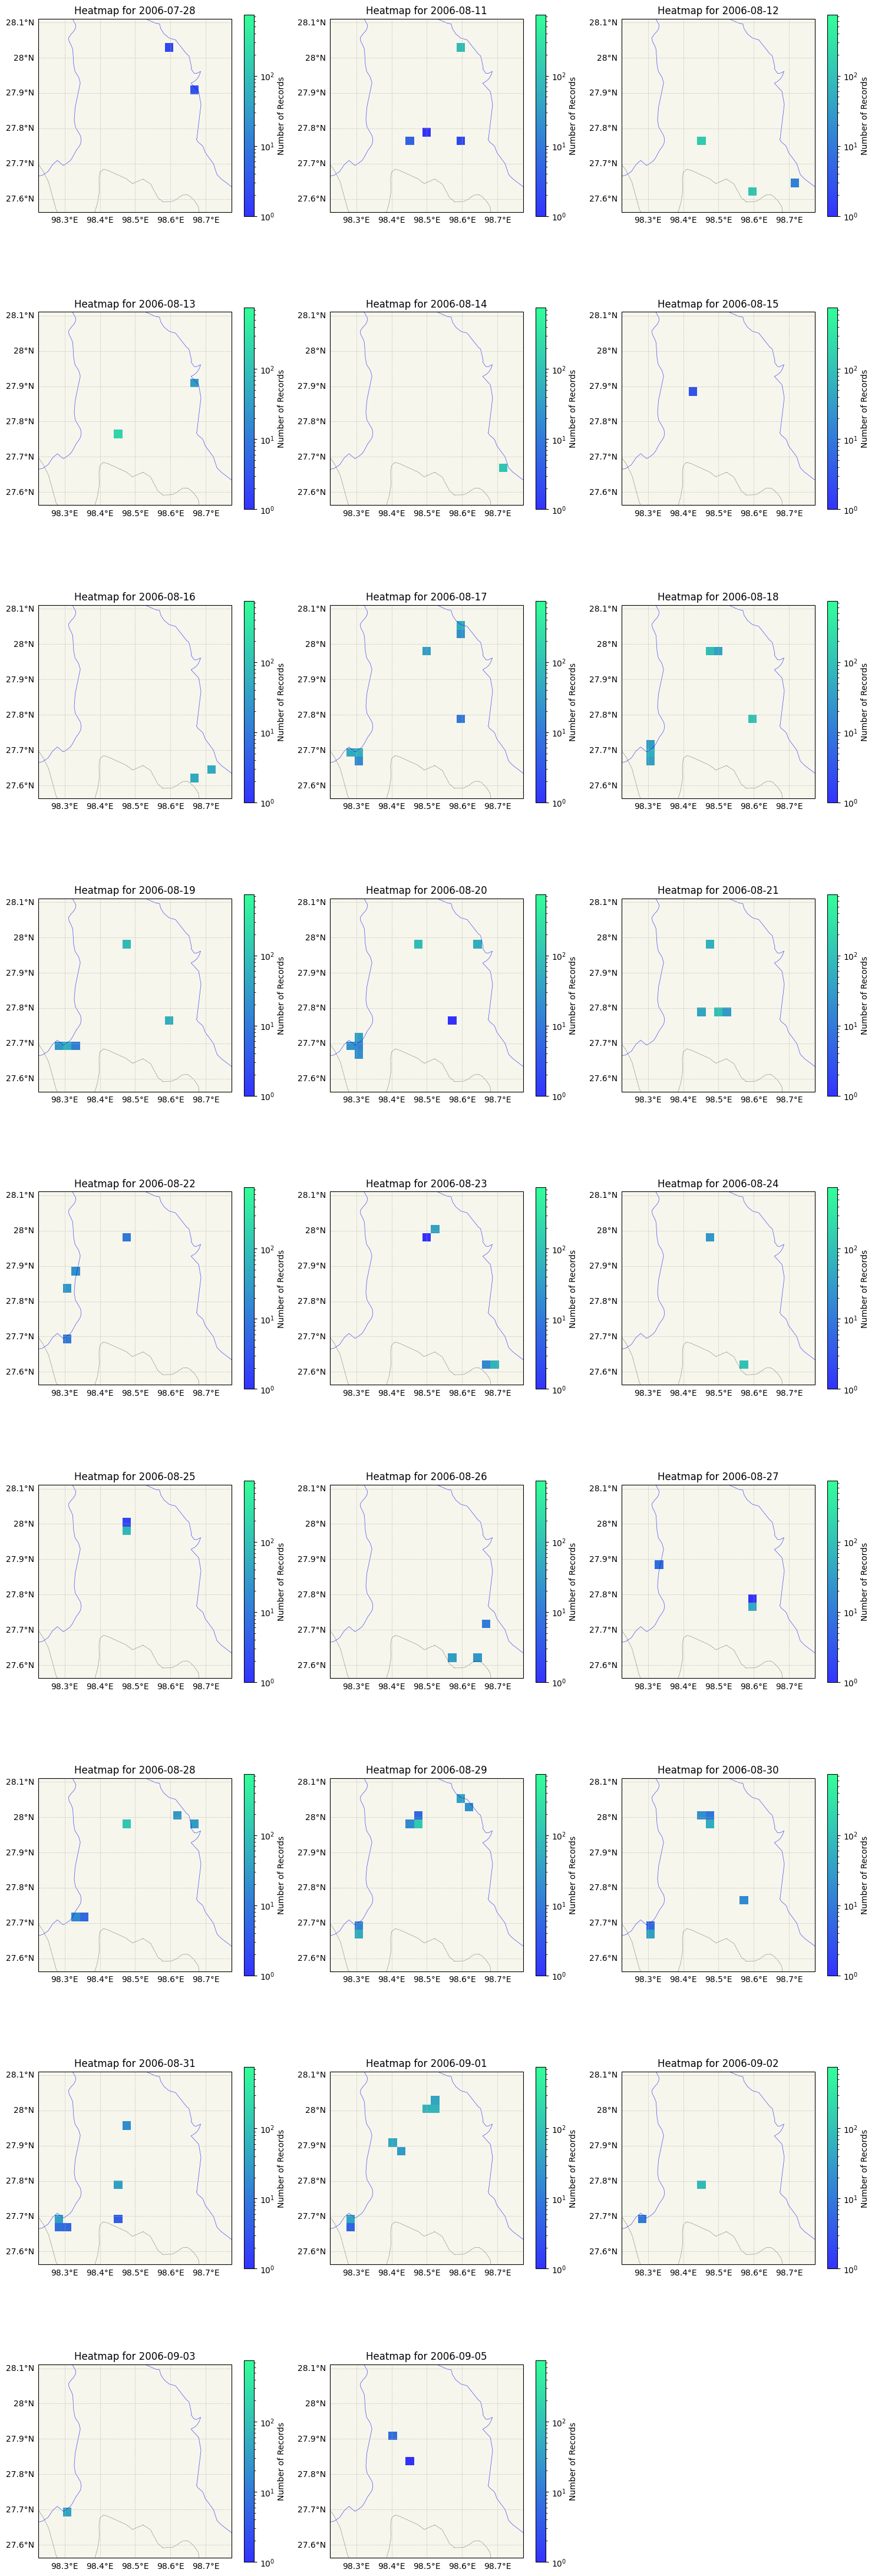

In [139]:
plot_geographical_heatmap_by_day(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                                 zoom=2, plot_rivers=True, plot_roads=True, grid_size=20)

3846 records, and it all looks like one cluster! - lets check it out as our first cluster

In [141]:
test_df.startdate.min()

Timestamp('2006-07-28 00:00:00')

### i.) Cluster 4: ('1998-10-20', '1998-11-08')

In [233]:
group0_df = test_df

group0_df

collectionobjectid                                              text1  \
11195              67951.0  Follaje con enves y brotes ferrugineos.  Flor ...   
86043             499874.0  Arbusto de 1.5 m, frutos maduros color turques...   
83970             481053.0  Arbusto de 0,5 m, flores y estambres rosado pr...   
86050             499888.0  Arbusto 1.5 m, fruto maduro, verde esmeralda; ...   
167909            789332.0                      Arbol de 6 m.  Frutos verdes.   
59234             363248.0                                   6 m. Frt verdes.   
232249           1091263.0  Arbusto de 3 m; frutos inmaduros lila, maduros...   
232247           1091261.0  Arbusto, brotes con pubescencia parda, frutos ...   
108072            677152.0  Arbol de 20 m x 30 cm DAP;  savia incolora, sá...   
232248           1091262.0            Arbusto de 1 m. Frutos maduros blancos.   
232250           1091264.0  Arbusto de 1.5 m; frutos inmaduros verdes, mad...   
166040            782578.0  Epífita, sépalos verde-amarillo, pétalos blanc...   
94637             575627.0  Arbusto de 3 m; frutos inmaduros rojos, maduro...   
48161             295569.0                  Arbusto epifito con flores rojas.   
101168            625541.0  Arbusto de 3 m. Frutos inmaduros verdes, madur...   
166018            782519.0  Epífita a 12 m.  Botones florales rosados flor...   
94119             569003.0  Hierba. Tallo verde, tricomas blancos, pedúncu...   
170503            800780.0  Arbusto de 3 m.  Flores con pétalos blancos, a...   
44847             275379.0  Arbusto de 3 m. Flores con pétalos blancos, an...   
61684             378381.0  Arbusto de 3 m. Frutos inmaduros verdes.  Flor...   
100205            620426.0  Arbusto.  Flores amarillas, filamentos blancos...   
101583            628129.0  Arbusto. Flores blancas, anteras amarillas, pe...   
99151             613621.0                     Arbol de 6 m. Flores blancas.    
166041            782580.0  Epífita.  Flores blancas, filamentos amarillos...   
99144             613588.0  Arbusto. Savia incolora. Flores blancas con ol...   
85473             495817.0           Arbusto. Flores blancas. Cáliz verdoso.    
93298             564224.0  Arbusto. Frutos premaduros rojizos, maduros mo...   
101738            629001.0  Arbol 8 m x 30 cm DAP.  Botones florales pardo...   

       countamt  collectingeventid  startdate enddate  \
11195       1.0             1974.0 1990-05-25     NaN   
86043       NaN           345010.0 1990-08-29     NaN   
83970       NaN           326452.0 1990-08-29     NaN   
86050       NaN           345024.0 1990-08-29     NaN   
167909      NaN           628416.0 1990-09-17     NaN   
59234       1.0            67649.0 1990-09-17     NaN   
232249      NaN           926082.0 1990-10-08     NaN   
232247      NaN           926080.0 1990-10-08     NaN   
108072      NaN           519079.0 1990-10-11     NaN   
232248      NaN           926081.0 1990-10-12     NaN   
232250      NaN           926083.0 1990-10-12     NaN   
166040      NaN           622090.0 1990-10-13     NaN   
94637       NaN           420068.0 1990-10-13     NaN   
48161       1.0           211321.0 1990-10-15     NaN   
101168      NaN           468434.0 1990-10-28     NaN   
166018      NaN           622036.0 1990-11-02     NaN   
94119       NaN           413547.0 1990-11-07     NaN   
170503      NaN           639564.0 1990-11-24     NaN   
44847       1.0            57595.0 1990-11-24     NaN   
61684       1.0            56136.0 1990-11-24     NaN   
100205      NaN           463373.0 1991-02-02     NaN   
101583      NaN           470952.0 1991-02-02     NaN   
99151       NaN           456691.0 1991-02-13     NaN   
166041      NaN           622091.0 1991-03-02     NaN   
99144       NaN           456658.0 1991-03-05     NaN   
85473       NaN           340959.0 1991-05-15     NaN   
93298       NaN           408785.0 1991-05-15     NaN   
101738      NaN           471792.0 1991-05-15     NaN   

    

In [234]:
group0_df.text1.isna().sum()/len(group0_df)

np.float64(0.0)

In [235]:
group0_df.text1.value_counts()

text1
Follaje con enves y brotes ferrugineos.  Flor de corola café rojizo.                                                                                                                                     1
Arbusto de 1.5 m, frutos maduros color turquesa; envés de las hojas blanquecinas.                                                                                                                        1
Arbusto. Frutos premaduros rojizos, maduros morados.                                                                                                                                                     1
Arbusto. Flores blancas. Cáliz verdoso.                                                                                                                                                                  1
Arbusto. Savia incolora. Flores blancas con olor agradable.                                                                                                                           

In [236]:
group0_df.localityname.value_counts()

localityname
Parque Nacional Guanacaste Estación Cacao. Liberia.                                                    2
Parque Nacional Guanacaste Estación Pitilla. Sendero Evangelista.                                      2
Parque Nacional Guanacaste Estación Cacao.  Liberia.                                                   2
Parque Nacional Guanacaste la Cruz, Santa Cecilia, Estacion Pitilla cuenca superior de Rio Orosi.      1
P.N. Guanacaste. Corillera de Guanacaste. Estación Pitilla.                                            1
Cordillera de Guanacaste. Estación Pitilla.                                                            1
Hacienda El Oro, lado norte del Volcán Orosí. Santa Cecilia.                                           1
Parque Nacional Guanacaste Estación Pitilla.  Fila Orosilito y Sendero El Mismo                        1
P. Nac. Rincón de la Vieja Colonia Blanca, a 2km de la casa del Administrator del IDA.                 1
Parque Nacional Guanacaste Estación Pitill

This is interesting, looks like there's a couple focal points. I wonder if these are base camp areas? 

Maybe there are multiple parties collecting samples in different areas on the same day, and that's why there is overlap.

There are a lot of interesting questions we can ask from this, but overall I would say this consists of a single expedition, and our first cluster! Lets label it in the larger df as cluster == 0

In [237]:
df.loc[group0_df.index, 'cluster'] = '4'
df[df.cluster == '4'].__len__()

28

## d.) Collection Object ID: 164829

In [301]:
samp_collobjid_l[3]

189769

In [302]:
samp_record = df[df.collectingeventid == samp_colleventid_l[3]]
samp_record

collectingeventid  startdate enddate  \
10499              16977 1995-08-03     NaN   

                                                 remarks  localityid  \
10499  Western Cedar (Thuja plicata) forest with Abie...     16977.0   

       minelevation  maxelevation  elevationaccuracy  latitude1  longitude1  \
10499           NaN           NaN                NaN  53.016666 -119.216667   

                                            localityname  \
10499  Mount Robson Provincial Park area ca. 2 km sou...   

                                              namedplace  geographyid  \
10499  Mount Robson Provincial Park area ca. 2 km sou...        558.0   

       centroidlat  centroidlon commonname                  fullname  \
10499         54.0       -100.0        NaN  British Columbia, Canada   

                   name  spatial_flag cluster  
10499  British Columbia             1       6

In [303]:
samp_record_lat = samp_record.latitude1.values[0]
samp_record_lon = samp_record.longitude1.values[0]
samp_record_startdate = samp_record.startdate.values[0]
print('lat:', samp_record_lat, '    lon:', samp_record_lon, '    start date:', samp_record_startdate)

lat: 53.0166664124     lon: -119.2166671753     start date: 1995-08-03T00:00:00.000000000


In [304]:
# Filter overall df to only records within 0.5º lat of the sample lat
test_df = df[abs(df.latitude1 - samp_record_lat) < 0.5].sort_values(by='startdate')

# Filter overall df to only records within 0.5º lon of the sample lon
test_df = test_df[abs(test_df.longitude1 - samp_record_lon) < 0.5].sort_values(by='startdate')

# Filter overall df to only records within 6 months of the sample startdate
test_df = test_df[test_df['startdate'].between(samp_record_startdate - pd.DateOffset(months=6), samp_record_startdate + pd.DateOffset(months=6))]


In [305]:
test_df.head(2)

collectingeventid  startdate enddate  \
47042              74811 1995-08-03     NaN   
83776             132356 1995-08-03     NaN   

                                                 remarks  localityid  \
47042  Growing in deep shade on underside of boulder....     74811.0   
83776                                                NaN    132356.0   

       minelevation  maxelevation  elevationaccuracy  latitude1  longitude1  \
47042           NaN           NaN                NaN  53.033333 -119.216667   
83776           NaN           NaN                NaN  53.033333 -119.216667   

                                            localityname  \
47042  Mount Robson Provincial Park area ca. 1 km sou...   
83776  Mount Robson Provincial Park area ca. 1 km sou...   

                                              namedplace  geographyid  \
47042  Mount Robson Provincial Park area ca. 1 km sou...        558.0   
83776  Mount Robson Provincial Park area ca. 1 km sou...        558.0   

       centroidlat  centroidlon commonname                  fullname  \
47042         54.0       -100.0        NaN  British Columbia, Canada   
83776         54.0       -100.0        NaN  British Columbia, Canada   

                   name  spatial_flag cluster  
47042  British Columbia             1       6  
83776  British Columbia             1       6

In [306]:
test_df.startdate.value_counts()

startdate
1995-08-03    59
Name: count, dtype: int64

In [307]:
test_df.localityname.value_counts()

localityname
Mount Robson Provincial Park area ca. 2 km south of Mt. Robson Information Center on the road to Mt. Robson Ranch.    28
Mount Robson Provincial Park area ca. 1 km south of Mt. Robson Information Center on the road to Mt. Robson Ranch.    25
Mt Robson; ~2 km S of Information Center on road to Mt. Robson Ranch.                                                  1
Mt. Robson; ~2 km S of Information Center on road to Mt. Robson Ranch.                                                 1
Mt. Robson - 2 km S of Information Center on road to Mt. Robson Ranch                                                  1
Mount Robson Provincial Park area ca. 2 km south of Mt Robson information Center on the road to Mt. Robson Ranch.      1
Mt. Robson; ~2km S of Information Center on road to Mt. Robson Ranch.                                                  1
Mt. Robson; ~2 km S of Information Center on road to Mt. Robson Ranch.                                                 1
Name: count, dtype:

Okay, now there's very little variation in localityname. 
Its all Mt. Robson Ranch.

In [167]:
test_df.startdate.sort_values().unique()

<DatetimeArray>
['1995-08-03 00:00:00']
Length: 1, dtype: datetime64[ns]

This all looks like one cluster! Let's plot it to get a sense of what we're looking at first...

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


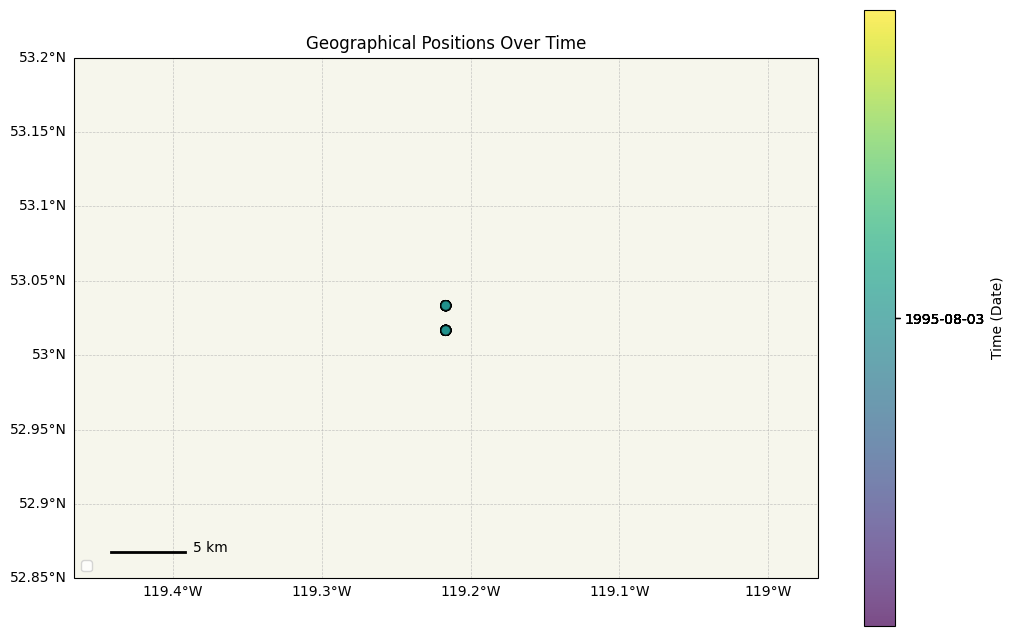

In [168]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=0.1, cluster_line=False)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


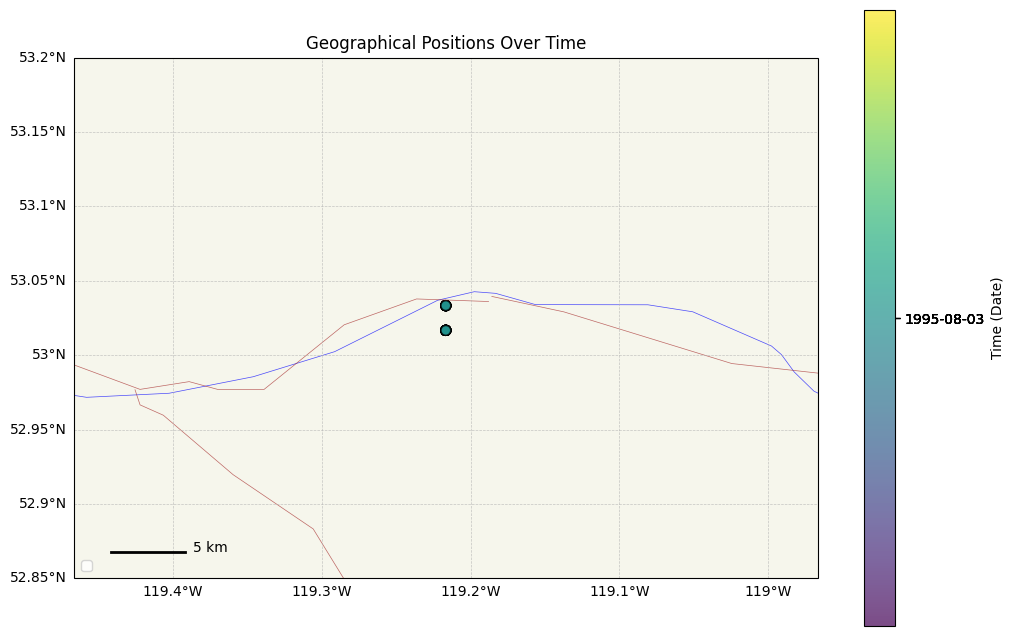

In [169]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=0.1, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


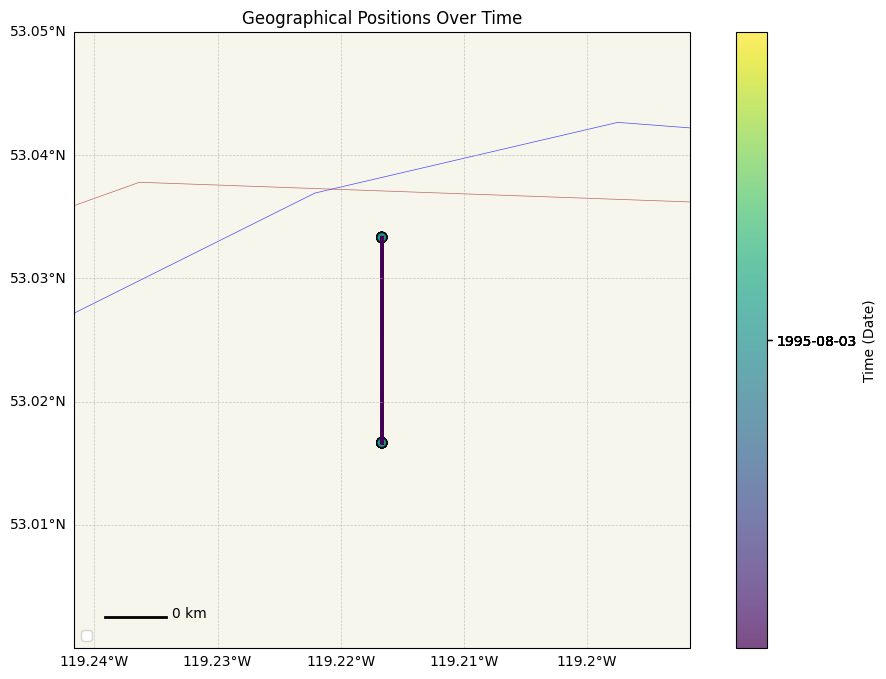

In [170]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=1, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

43 records, and it all looks like one cluster! - lets check it out as our first cluster

In [171]:
test_df.startdate.min()

Timestamp('1995-08-03 00:00:00')

### i.) Cluster 5: ('1998-10-20', '1998-11-08')

In [172]:
group0_df = test_df

In [175]:
group0_df.localityname.value_counts()

localityname
Mount Robson Provincial Park area ca. 2 km south of Mt. Robson Information Center on the road to Mt. Robson Ranch.    28
Mount Robson Provincial Park area ca. 1 km south of Mt. Robson Information Center on the road to Mt. Robson Ranch.    25
Mt Robson; ~2 km S of Information Center on road to Mt. Robson Ranch.                                                  1
Mt. Robson; ~2 km S of Information Center on road to Mt. Robson Ranch.                                                 1
Mt. Robson - 2 km S of Information Center on road to Mt. Robson Ranch                                                  1
Mount Robson Provincial Park area ca. 2 km south of Mt Robson information Center on the road to Mt. Robson Ranch.      1
Mt. Robson; ~2km S of Information Center on road to Mt. Robson Ranch.                                                  1
Mt. Robson; ~2 km S of Information Center on road to Mt. Robson Ranch.                                                 1
Name: count, dtype:

In [176]:
df.loc[group0_df.index, 'cluster'] = '5'
df[df.cluster == '5'].__len__()

59

## e.) Collection Object ID: 296037

In [308]:
samp_colleventid_l[4]

819069

In [267]:
# samp_record = df[df.collectionobjectid == samp_colleventid_l[4]]

samp_record = df[df.collectingeventid == samp_colleventid_l[4]]


samp_record

collectingeventid  startdate enddate                      remarks  \
641457             819069 2005-05-11     NaN  On bare soil in mowed field   

        localityid  minelevation  maxelevation  elevationaccuracy  latitude1  \
641457    755260.0         500.0           NaN                NaN  42.808333   

        longitude1                                 localityname namedplace  \
641457  -71.683611  Mullen Road. Hitchener Town Forest, Milford        NaN   

        geographyid  centroidlat  centroidlon commonname  \
641457      12453.0        42.93       -71.72        NaN   

                                                 fullname  \
641457  Hillsborough County, New Hampshire, United States   

                       name  spatial_flag cluster  
641457  Hillsborough County             1     NaN

In [268]:
samp_record_lat = samp_record.latitude1.values[0]
samp_record_lon = samp_record.longitude1.values[0]
samp_record_startdate = samp_record.startdate.values[0]
print('lat:', samp_record_lat, '    lon:', samp_record_lon, '    start date:', samp_record_startdate)

lat: 42.8083333333     lon: -71.6836111111     start date: 2005-05-11T00:00:00.000000000


In [269]:
# Filter overall df to only records within 0.5º lat of the sample lat
test_df = df[abs(df.latitude1 - samp_record_lat) < 0.5].sort_values(by='startdate')

# Filter overall df to only records within 0.5º lon of the sample lon
test_df = test_df[abs(test_df.longitude1 - samp_record_lon) < 0.5].sort_values(by='startdate')

# Filter overall df to only records within 6 months of the sample startdate
test_df = test_df[test_df['startdate'].between(samp_record_startdate - pd.DateOffset(months=6), samp_record_startdate + pd.DateOffset(months=6))]


In [270]:
print(len(test_df))

test_df.head(2)

71


collectingeventid  startdate enddate  \
639307             813963 2005-05-08     NaN   
562796             711997 2005-05-08     NaN   

                                                  remarks  localityid  \
639307  On moist soil under grasses and an overarching...    751882.0   
562796                  On bare soil in fallow cornfield.    669271.0   

        minelevation  maxelevation  elevationaccuracy  latitude1  longitude1  \
639307          60.0           NaN                NaN  42.848889  -71.693056   
562796          60.0           NaN                NaN  42.848889  -71.693056   

                                             localityname namedplace  \
639307  near the fish hatchery off the North River Roa...        NaN   
562796  Near the Souhegen River behind the fish hatche...        NaN   

        geographyid  centroidlat  centroidlon commonname  \
639307      12453.0        42.93       -71.72        NaN   
562796      12453.0        42.93       -71.72        NaN   

                                                 fullname  \
639307  Hillsborough County, New Hampshire, United States   
562796  Hillsborough County, New Hampshire, United States   

                       name  spatial_flag cluster  
639307  Hillsborough County             1     NaN  
562796  Hillsborough County             1     NaN

In [271]:
test_df.startdate.value_counts()

startdate
2005-05-09    19
2005-05-19    18
2005-05-10    13
2005-05-08     7
2005-05-11     7
2005-05-20     5
2005-05-18     1
2005-08-10     1
Name: count, dtype: int64

In [272]:
test_df.localityname.value_counts()

localityname
Maple Hill Farm, Beaver Brook Association, Ridge Road, Hollis                                                                                                   5
Tucker Brook Town Forest, Milford                                                                                                                               3
Hitchener Town Forest, Milford                                                                                                                                  3
Near the Milford township Souhegan River trail off North River Road, Milford                                                                                    3
Souhegan River near the Milford Township Souhegan River Trail off the North River Road                                                                          2
Maple Hill Farm, Beaver Brook Association, Ridge Road, Hollis.                                                                                                  2
Off Milford tow

Okay, now there's a fair amount of variability... 

In [273]:
test_df.startdate.sort_values().unique()

<DatetimeArray>
['2005-05-08 00:00:00', '2005-05-09 00:00:00', '2005-05-10 00:00:00',
 '2005-05-11 00:00:00', '2005-05-18 00:00:00', '2005-05-19 00:00:00',
 '2005-05-20 00:00:00', '2005-08-10 00:00:00']
Length: 8, dtype: datetime64[ns]

In [274]:
cluster_date_l = [
    ('2005-05-08', '2005-05-20'),
    ('2005-08-10', '2005-08-10')
]

In [276]:
samp_record

collectingeventid  startdate enddate                      remarks  \
641457             819069 2005-05-11     NaN  On bare soil in mowed field   

        localityid  minelevation  maxelevation  elevationaccuracy  latitude1  \
641457    755260.0         500.0           NaN                NaN  42.808333   

        longitude1                                 localityname namedplace  \
641457  -71.683611  Mullen Road. Hitchener Town Forest, Milford        NaN   

        geographyid  centroidlat  centroidlon commonname  \
641457      12453.0        42.93       -71.72        NaN   

                                                 fullname  \
641457  Hillsborough County, New Hampshire, United States   

                       name  spatial_flag cluster  
641457  Hillsborough County             1     NaN

This looks like two separate clusters... One in May (which our sample record falls in) and one in August

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


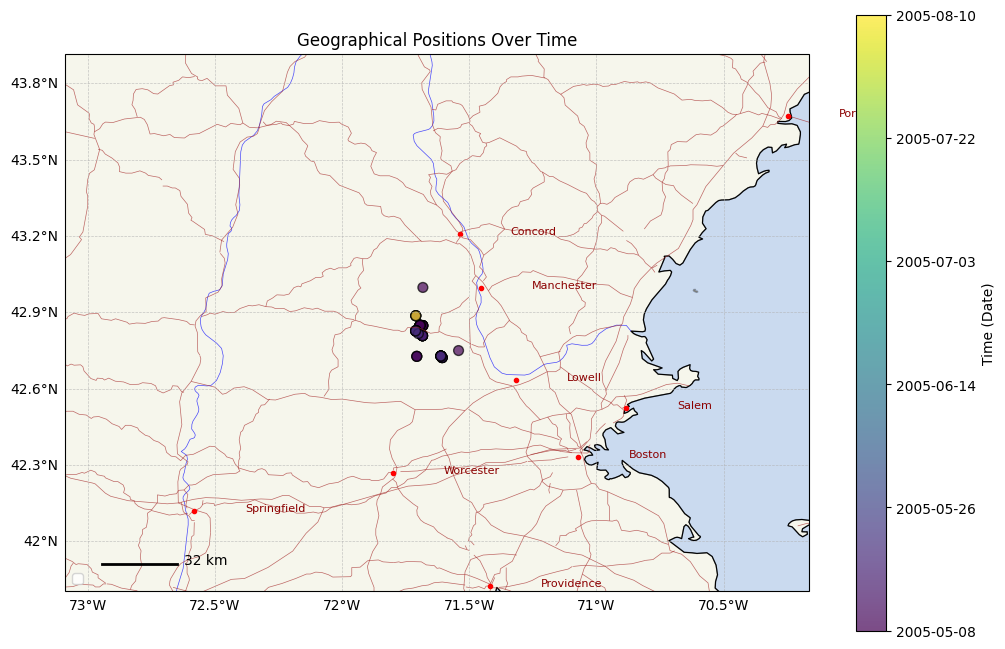

In [283]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=0.3, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

In [284]:
test_df.startdate.min()

Timestamp('2005-05-08 00:00:00')

In [285]:
cluster_date_l

[('2005-05-08', '2005-05-20'), ('2005-08-10', '2005-08-10')]

### i.) Cluster 6: ('2005-05-08', '2005-05-20')

In [287]:
group0_df = test_df[(pd.to_datetime(cluster_date_l[0][0]) <= test_df['startdate']) & (test_df['startdate'] <= pd.to_datetime(cluster_date_l[0][1]))][['latitude1', 'longitude1', 'remarks', 'localityname', 'startdate', 'enddate']]


In [288]:
group0_df.localityname.value_counts()

localityname
Maple Hill Farm, Beaver Brook Association, Ridge Road, Hollis                                                                                                   5
Hitchener Town Forest, Milford                                                                                                                                  3
Tucker Brook Town Forest, Milford                                                                                                                               3
Near the Milford township Souhegan River trail off North River Road, Milford                                                                                    3
Souhegan River near the Milford Township Souhegan River Trail off the North River Road                                                                          2
Off Milford township Souhegan River trail off the North River Road, Milford                                                                                     2
Maple Hill Farm

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


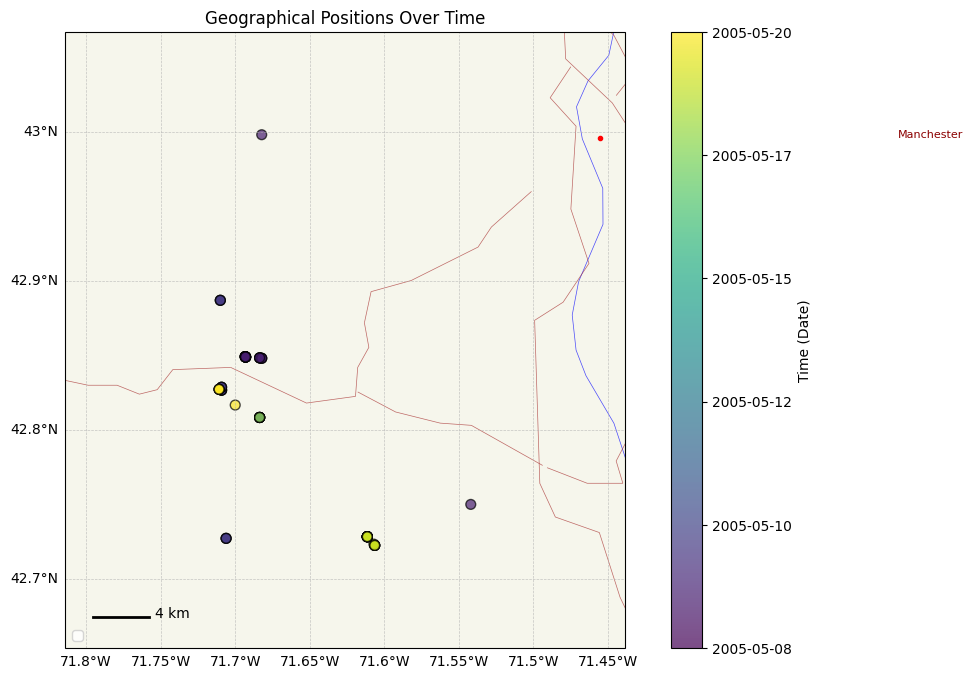

In [289]:
plot_geographical_positions(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=4, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


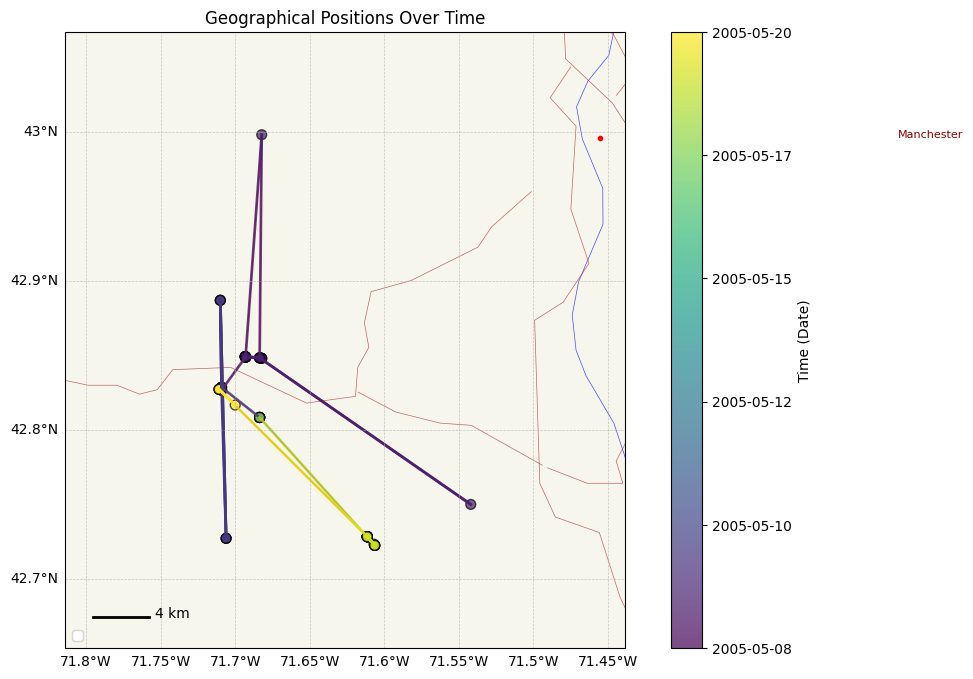

In [290]:
plot_geographical_positions(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=4, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

Yikes this is all over the place. Maybe a couple teams collecting in different areas on the same day.

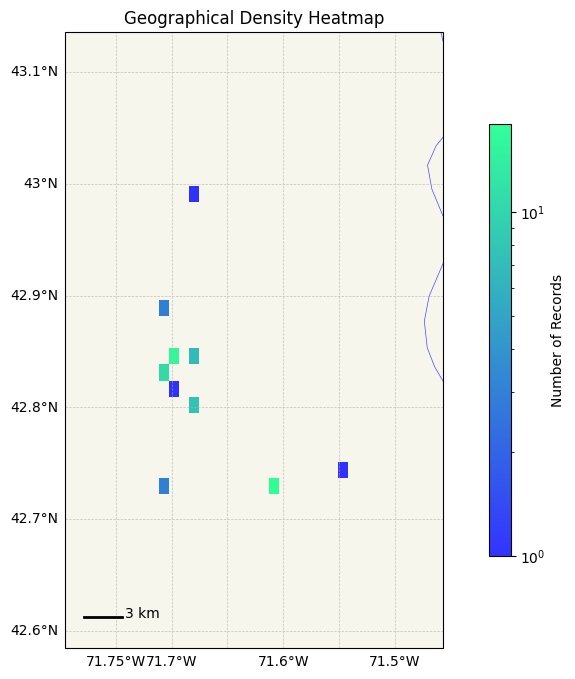

In [291]:
plot_geographical_heatmap(group0_df, lat_col='latitude1', lon_col='longitude1', grid_size=20,
                          zoom=2,  plot_rivers=True, plot_roads=True)


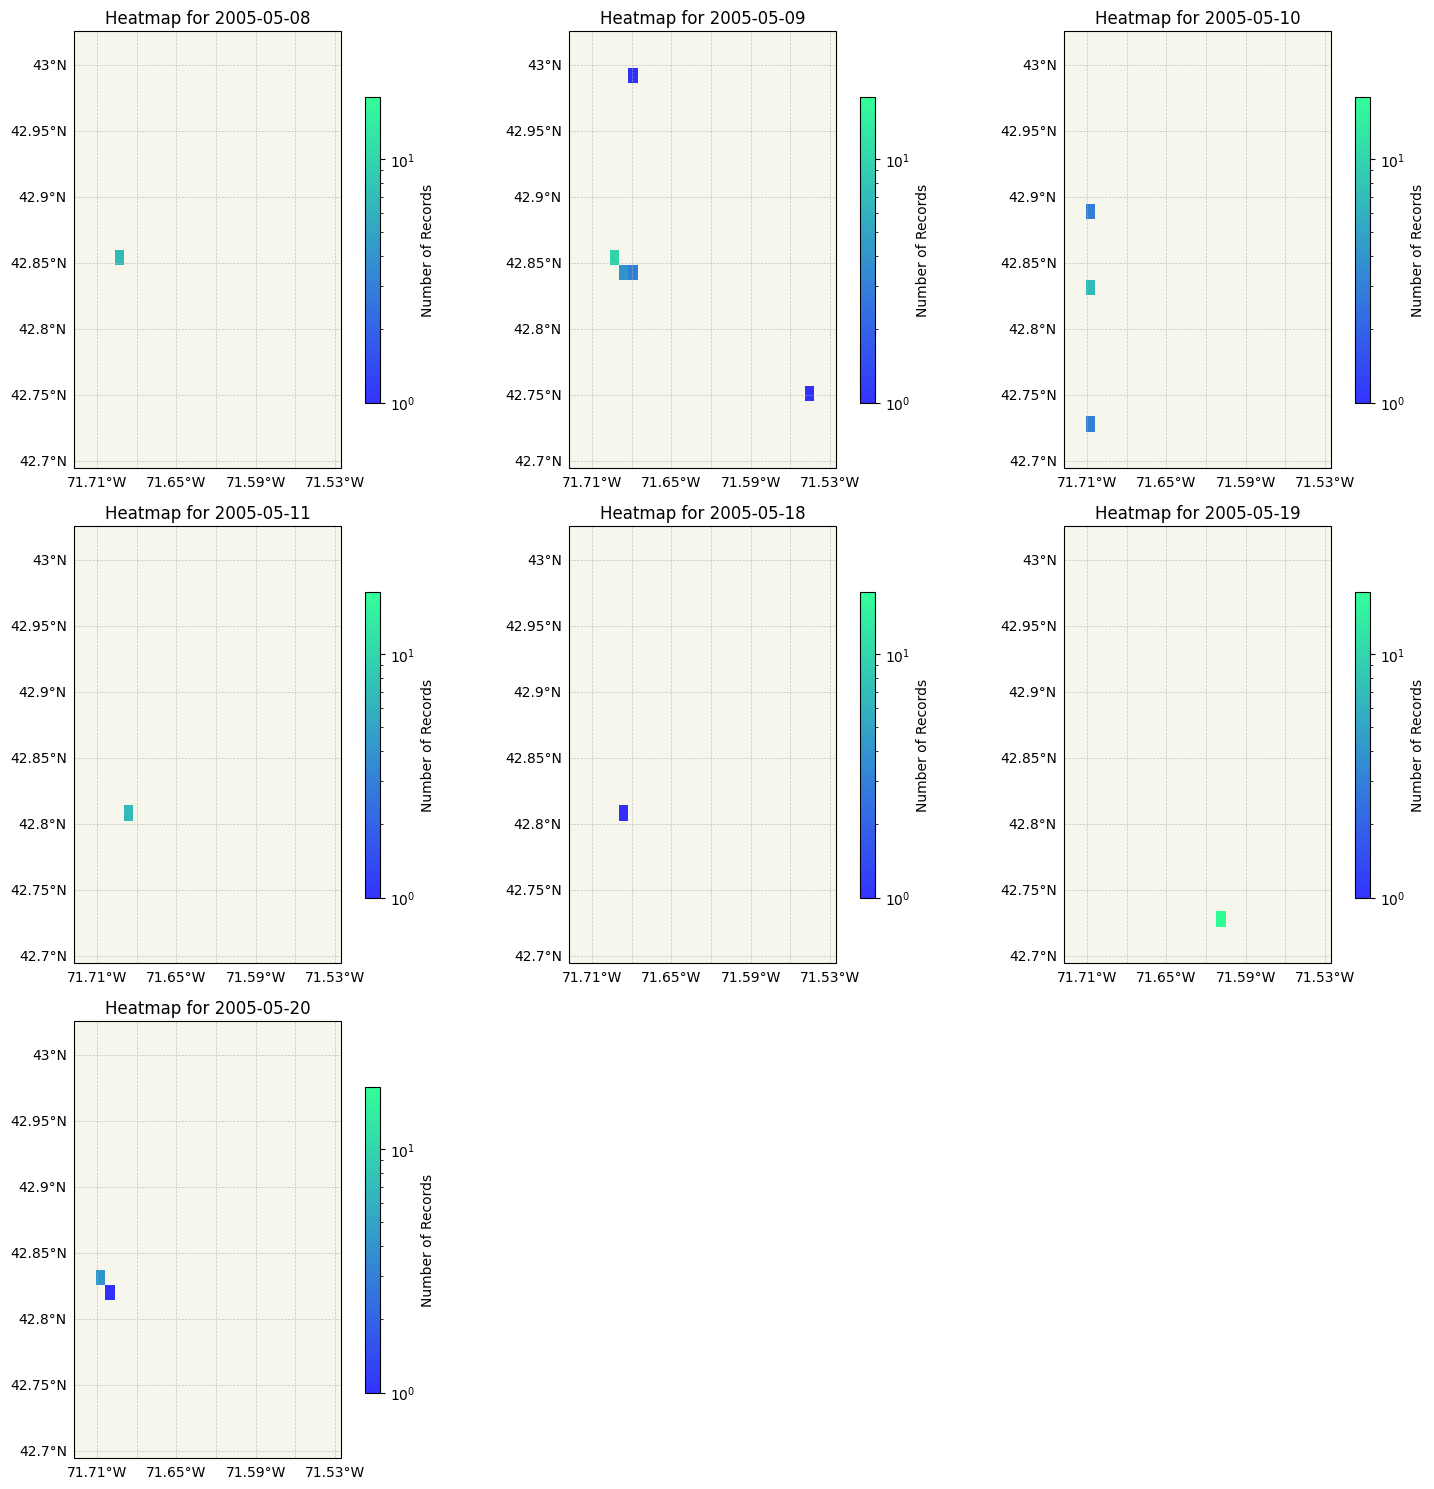

In [292]:
plot_geographical_heatmap_by_day(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',plot_rivers=True, plot_roads=True, grid_size=25)

Looks like it varies by the day, but there are often 2 separate miniclusters... probably two different teams.

That being said, it all looks like a single cluster to me!

In [293]:
df.loc[group0_df.index, 'cluster'] = '6'
df[df.cluster == '6'].__len__()

130

In [294]:
cluster_date_l

[('2005-05-08', '2005-05-20'), ('2005-08-10', '2005-08-10')]

### i.) Cluster 7: ('2005-08-10', '2005-08-10')

In [295]:
group0_df = test_df[(pd.to_datetime(cluster_date_l[1][0]) <= test_df['startdate']) & (test_df['startdate'] <= pd.to_datetime(cluster_date_l[1][1]))][['latitude1', 'longitude1', 'remarks', 'localityname', 'startdate', 'enddate']]

group0_df

latitude1  longitude1  \
608369  42.886944      -71.71   

                                                  remarks  \
608369  On dripping granitic cliff to the side of Purg...   

                                             localityname  startdate enddate  
608369  Near township line between Mont Vernon and Lyn... 2005-08-10     NaN

In [296]:
group0_df.localityname.value_counts()

localityname
Near township line between Mont Vernon and Lyndeborough.     1
Name: count, dtype: int64

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


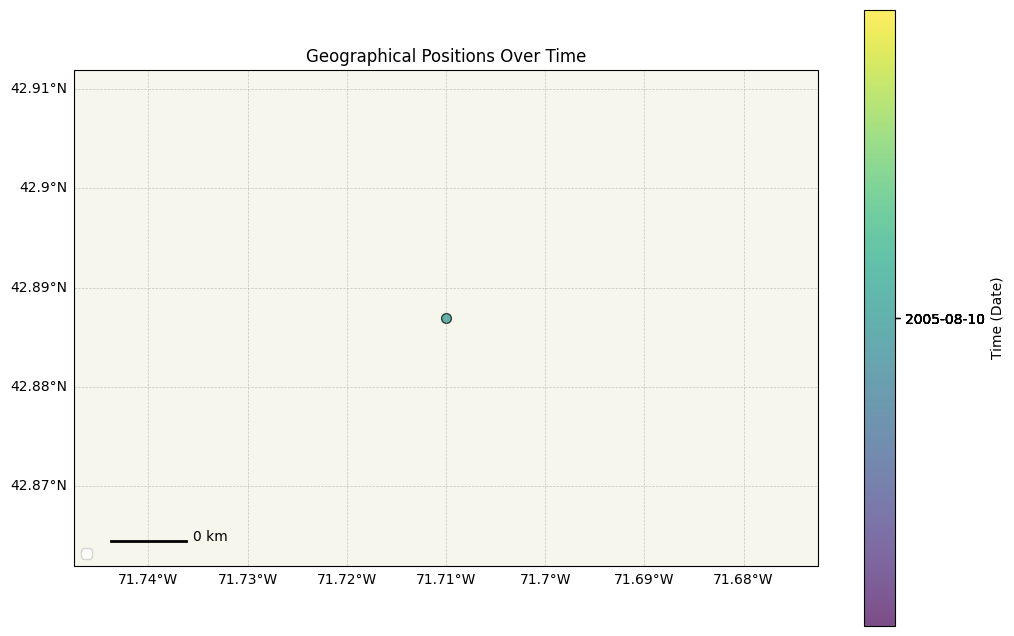

In [297]:
plot_geographical_positions(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=4, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


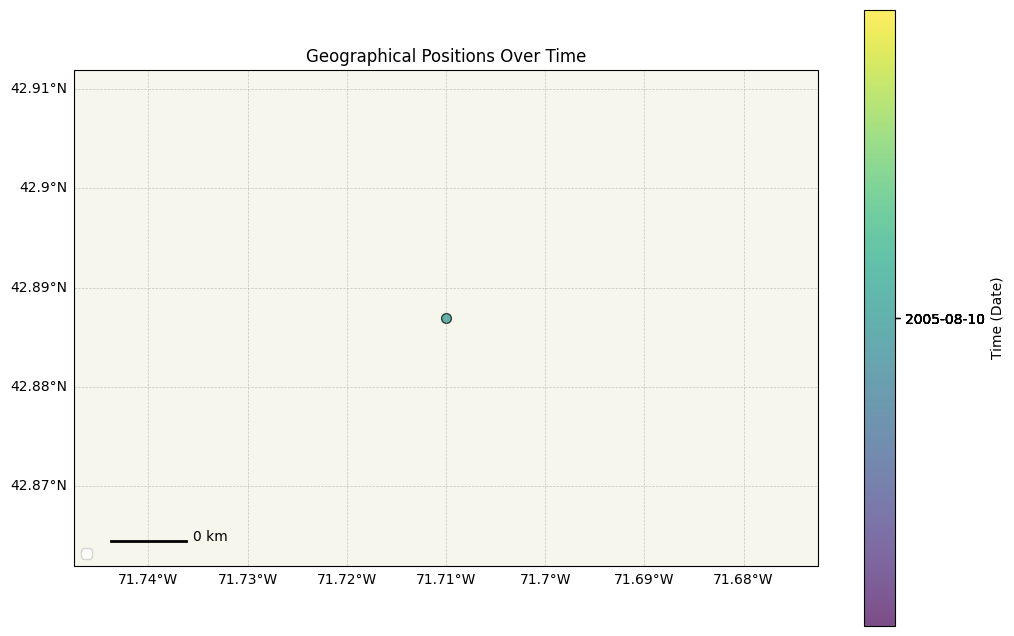

In [298]:
plot_geographical_positions(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=4, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

Much more linear!

/opt/anaconda3/envs/expedition-clustering/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:856: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  self.set_xlim([x1, x2])
/opt/anaconda3/envs/expedition-clustering/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:857: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.set_ylim([y1, y2])


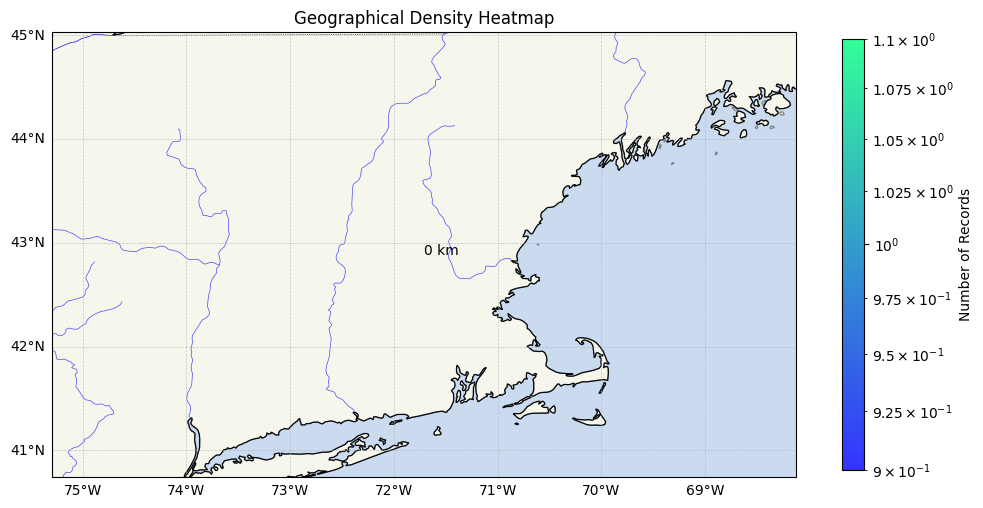

In [226]:
plot_geographical_heatmap(group0_df, lat_col='latitude1', lon_col='longitude1', grid_size=20,
                          zoom=2,  plot_rivers=True, plot_roads=True)


/opt/anaconda3/envs/expedition-clustering/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:856: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  self.set_xlim([x1, x2])
/opt/anaconda3/envs/expedition-clustering/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:857: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.set_ylim([y1, y2])


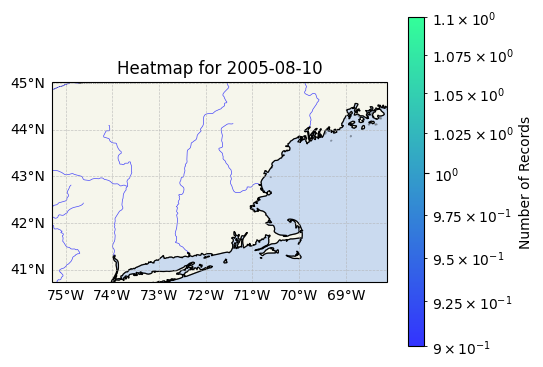

In [227]:
plot_geographical_heatmap_by_day(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',plot_rivers=True, plot_roads=True, grid_size=25)

Looks like it varies by the day, but there are often 2 separate miniclusters... probably two different teams.

That being said, it all looks like a single cluster to me!

In [299]:
df.loc[group0_df.index, 'cluster'] = '7'
df[df.cluster == '7'].__len__()

1

## f.) Collection Object ID: 244207

In [314]:
samp_colleventid_l[5]

126488

In [315]:
df[df.localityid == 126488]

collectingeventid  startdate     enddate remarks  localityid  \
80063             126488 1934-03-04  1934-03-04     NaN    126488.0   

       minelevation  maxelevation  elevationaccuracy  latitude1  longitude1  \
80063           NaN           NaN                NaN    39.3111   -123.7615   

                         localityname namedplace  geographyid  centroidlat  \
80063  2 miles east of Mendocino City        NaN      16880.0        39.42   

       centroidlon commonname                                     fullname  \
80063       -100.0        NaN  Mendocino County, California, United States   

                   name  spatial_flag cluster  
80063  Mendocino County             1     NaN

In [316]:
samp_record = df[df.collectingeventid == 126488]
samp_record

collectingeventid  startdate     enddate remarks  localityid  \
80063             126488 1934-03-04  1934-03-04     NaN    126488.0   

       minelevation  maxelevation  elevationaccuracy  latitude1  longitude1  \
80063           NaN           NaN                NaN    39.3111   -123.7615   

                         localityname namedplace  geographyid  centroidlat  \
80063  2 miles east of Mendocino City        NaN      16880.0        39.42   

       centroidlon commonname                                     fullname  \
80063       -100.0        NaN  Mendocino County, California, United States   

                   name  spatial_flag cluster  
80063  Mendocino County             1     NaN

In [317]:
samp_record_lat = samp_record.latitude1.values[0]
samp_record_lon = samp_record.longitude1.values[0]
samp_record_startdate = samp_record.startdate.values[0]
print('lat:', samp_record_lat, '    lon:', samp_record_lon, '    start date:', samp_record_startdate)

lat: 39.3111     lon: -123.7615     start date: 1934-03-04T00:00:00.000000000


In [318]:
# Filter overall df to only records within 0.5º lat of the sample lat
test_df = df[abs(df.latitude1 - samp_record_lat) < 0.5].sort_values(by='startdate')

# Filter overall df to only records within 0.5º lon of the sample lon
test_df = test_df[abs(test_df.longitude1 - samp_record_lon) < 0.5].sort_values(by='startdate')

# Filter overall df to only records within 6 months of the sample startdate
test_df = test_df[test_df['startdate'].between(samp_record_startdate - pd.DateOffset(months=6), samp_record_startdate + pd.DateOffset(months=6))]


In [319]:
print(len(test_df))

test_df.head(2)

36


collectingeventid  startdate     enddate                 remarks  \
114922             181202 1933-11-07  1933-11-07      On edge of forest.   
161340             247550 1933-11-07         NaN  In open grassy fields.   

        localityid  minelevation  maxelevation  elevationaccuracy  latitude1  \
114922    181202.0           NaN           NaN                NaN    38.9623   
161340    247015.0           NaN           NaN                NaN    38.9615   

        longitude1              localityname namedplace  geographyid  \
114922   -123.6867  5 mi. n. of Point Arena.        NaN      16880.0   
161340   -123.6862   5 mi. N. of Point Arena        NaN      16880.0   

        centroidlat  centroidlon commonname  \
114922        39.42       -100.0        NaN   
161340        39.42       -100.0        NaN   

                                           fullname              name  \
114922  Mendocino County, California, United States  Mendocino County   
161340  Mendocino County, California, United States  Mendocino County   

        spatial_flag cluster  
114922             1     NaN  
161340             1     NaN

In [320]:
test_df.localityname.value_counts()

localityname
2 miles east of Mendocino City                          7
6 miles south of Point Arena                            5
5 mi. N. of Point Arena                                 4
5 mi. n. of Point Arena.                                2
White plains three miles east of Mendocino City         2
2 miles east of Mendocino                               2
6 mi. s. of Point Arena.                                2
Mendocino City                                          1
Mendocino City.                                         1
6 mi. s of Point Arena.                                 1
Along Navarro River 5 miles west of Navarro.            1
Along Navarro River, 5 miles west of Navarro.           1
About 5 miles west of Branscomb, on road to Westport    1
Along roadside fronting the ocean, near Westport.       1
Six miles south of Point Arena                          1
4 4/10 mi. from Rockport                                1
Mendocino.                                              1
5

Okay, now there's a fair amount of variability... 

In [321]:
test_df.startdate.value_counts()

startdate
1934-03-04    13
1934-03-03     8
1933-11-07     7
1934-09-03     3
1934-06-30     2
1934-05-29     1
1934-05-30     1
1934-06-09     1
Name: count, dtype: int64

It looks like there are a number of different clusters here.

In [322]:
test_df.startdate.unique()

<DatetimeArray>
['1933-11-07 00:00:00', '1934-03-03 00:00:00', '1934-03-04 00:00:00',
 '1934-05-29 00:00:00', '1934-05-30 00:00:00', '1934-06-09 00:00:00',
 '1934-06-30 00:00:00', '1934-09-03 00:00:00']
Length: 8, dtype: datetime64[ns]

In [323]:
cluster_date_l = [
    ('1933-11-07', '1933-11-07'),
    ('1934-03-03', '1934-03-04'),
    ('1934-06-09', '1934-06-09'),
    ('1934-06-30', '1934-06-30'),
    ('1934-09-03', '1934-09-03'),
]

In [324]:
samp_record

collectingeventid  startdate     enddate remarks  localityid  \
80063             126488 1934-03-04  1934-03-04     NaN    126488.0   

       minelevation  maxelevation  elevationaccuracy  latitude1  longitude1  \
80063           NaN           NaN                NaN    39.3111   -123.7615   

                         localityname namedplace  geographyid  centroidlat  \
80063  2 miles east of Mendocino City        NaN      16880.0        39.42   

       centroidlon commonname                                     fullname  \
80063       -100.0        NaN  Mendocino County, California, United States   

                   name  spatial_flag cluster  
80063  Mendocino County             1     NaN

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


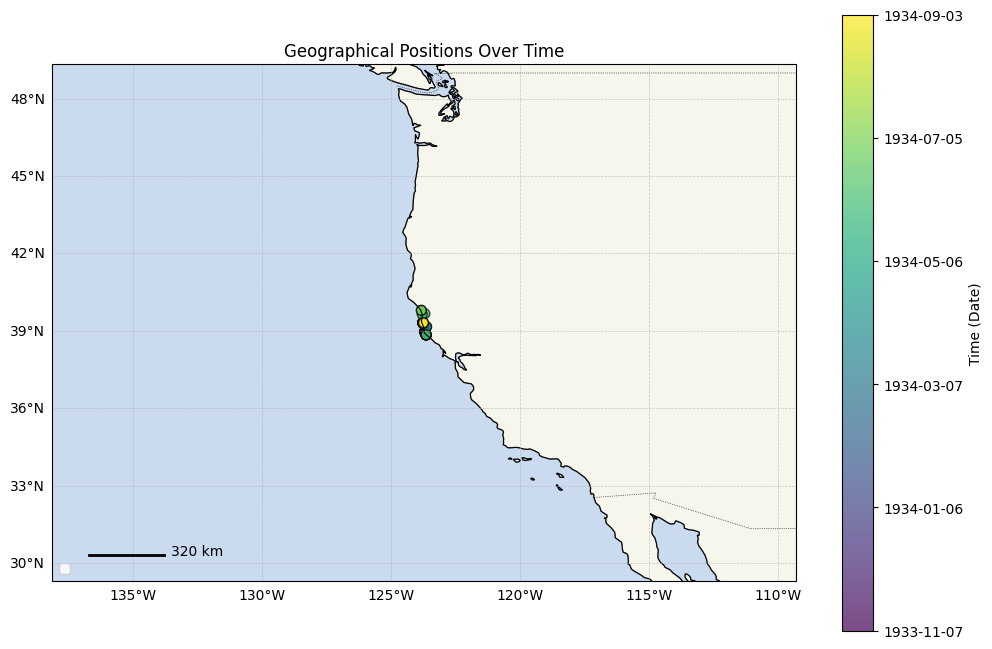

In [325]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=0.1, cluster_line=False)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


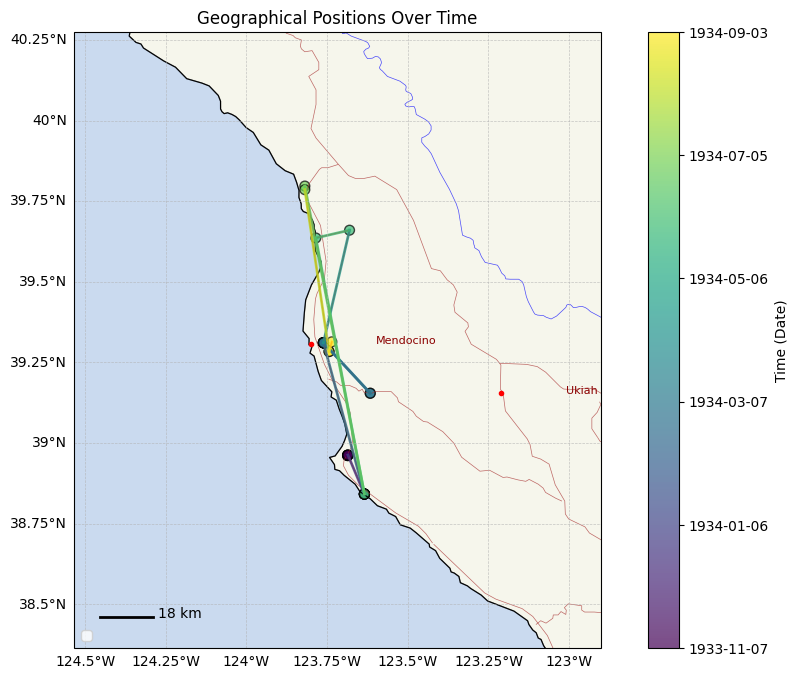

In [326]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=2, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

In [327]:
test_df.startdate.min()

Timestamp('1933-11-07 00:00:00')

In [328]:
cluster_date_l

[('1933-11-07', '1933-11-07'),
 ('1934-03-03', '1934-03-04'),
 ('1934-06-09', '1934-06-09'),
 ('1934-06-30', '1934-06-30'),
 ('1934-09-03', '1934-09-03')]

### i.) Cluster 8: ('1933-11-07', '1934-03-04')

In [329]:
group0_df = test_df[(pd.to_datetime(cluster_date_l[0][0]) <= test_df['startdate']) & (test_df['startdate'] <= pd.to_datetime(cluster_date_l[0][1]))][['latitude1', 'longitude1', 'text1', 'remarks', 'localityname', 'startdate', 'enddate']]

group0_df

KeyError: "['text1'] not in index"

In [ ]:
group0_df.text1.isna().sum()/len(group0_df)

np.float64(0.2857142857142857)

In [ ]:
group0_df.text1.value_counts()

text1
Trees 20-50 ft. high; foliage a vivid green with yellowish tinge different from muricata; cones persistent on old branches, in a whorl or opposite pair at nodes.    2
Low coarse shrub 1 m. or less high.                                                                                                                                  2
Tree 5 m. high with bare, very white trunk, unbranched for lowest 2 m.                                                                                               1
Name: count, dtype: int64

In [ ]:
group0_df.localityname.value_counts()

localityname
5 mi. N. of Point Arena     4
5 mi. n. of Point Arena.    2
5 mi. N. of Point Arena.    1
Name: count, dtype: int64

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


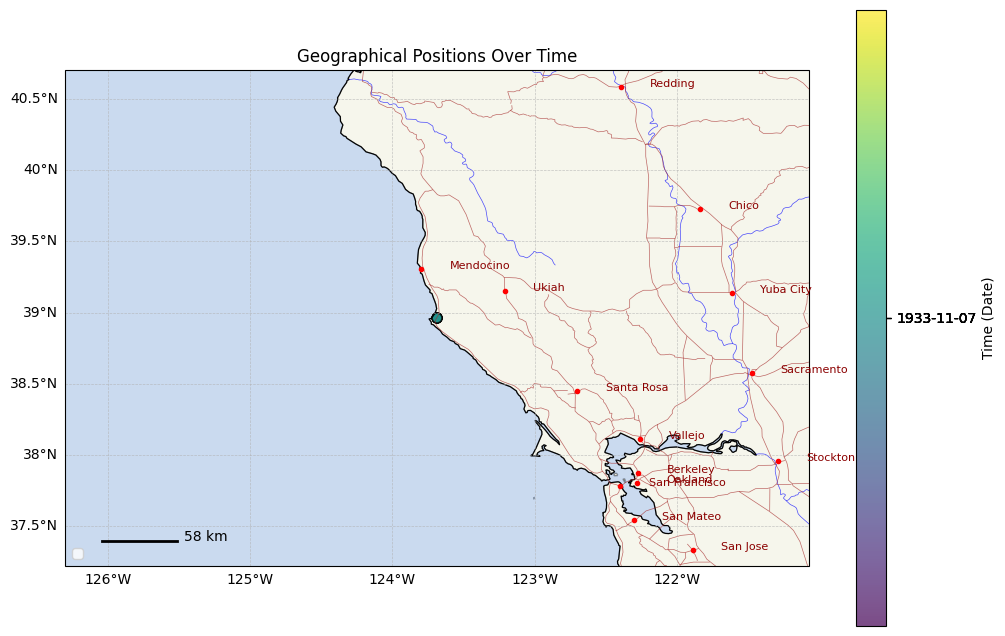

In [ ]:
plot_geographical_positions(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=.001, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


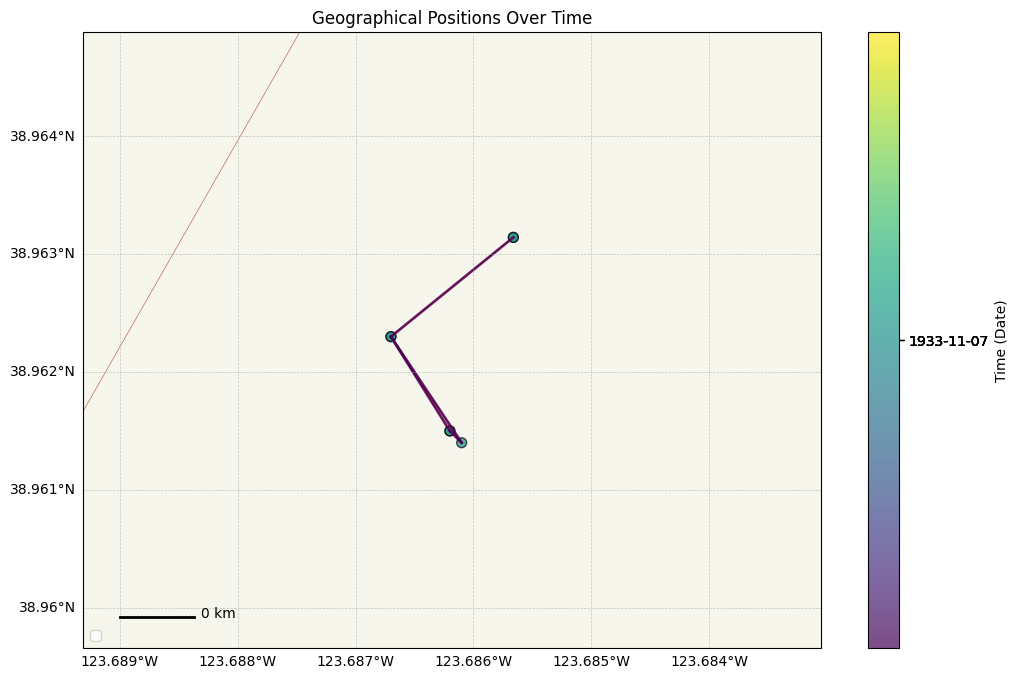

In [ ]:
plot_geographical_positions(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=1, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

Beautiful linear expedition!

/opt/anaconda3/envs/expedition-clustering/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:856: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  self.set_xlim([x1, x2])
/opt/anaconda3/envs/expedition-clustering/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:857: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.set_ylim([y1, y2])


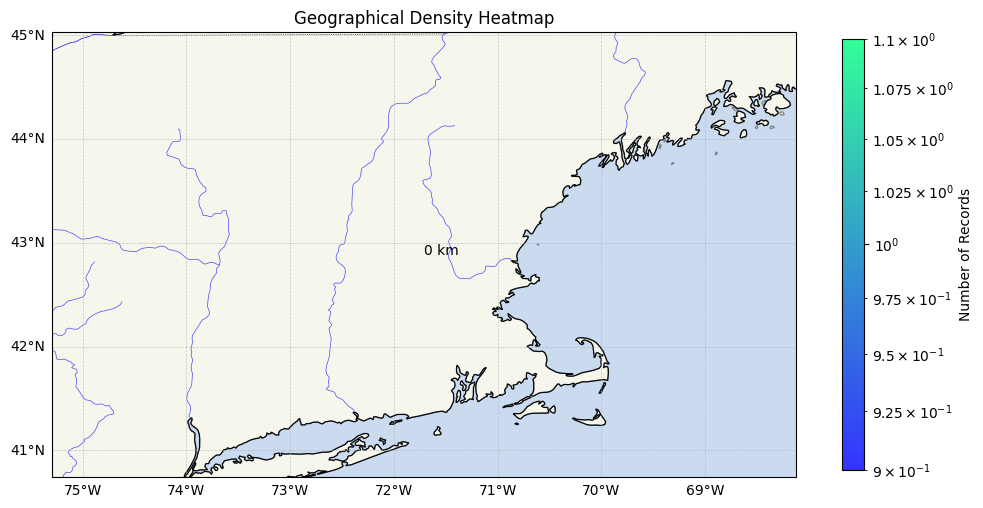

In [330]:
plot_geographical_heatmap(group0_df, lat_col='latitude1', lon_col='longitude1', grid_size=20,
                          zoom=1,  plot_rivers=True, plot_roads=True)


Looks like it varies by the day, but there are often 2 separate miniclusters... probably two different teams.

That being said, it all looks like a single cluster to me!

In [331]:
df.loc[group0_df.index, 'cluster'] = '8'
df[df.cluster == '8'].__len__()

1

In [332]:
cluster_date_l

[('1933-11-07', '1933-11-07'),
 ('1934-03-03', '1934-03-04'),
 ('1934-06-09', '1934-06-09'),
 ('1934-06-30', '1934-06-30'),
 ('1934-09-03', '1934-09-03')]

### ii.) Cluster 9: ('1934-03-03', '1934-03-04')

In [336]:
group0_df = test_df[(pd.to_datetime(cluster_date_l[1][0]) <= test_df['startdate']) & (test_df['startdate'] <= pd.to_datetime(cluster_date_l[1][1]))][['latitude1', 'longitude1', 'remarks', 'localityname', 'startdate', 'enddate']]

group0_df

latitude1  longitude1      remarks  \
96394     38.8421   -123.6345          NaN   
87236     38.8421   -123.6345          NaN   
9889      38.8421   -123.6345          NaN   
4579      38.8421   -123.6345          NaN   
20457     38.8421   -123.6345          NaN   
96393     38.8421   -123.6345          NaN   
136677    38.8421   -123.6345          NaN   
9320      38.8421   -123.6345          NaN   
189522    39.3111   -123.7615          NaN   
108794    39.3111   -123.7615          NaN   
43671     39.3111   -123.7615          NaN   
137153    39.3111   -123.7615          NaN   
91609     39.3111   -123.7615          NaN   
26430     39.3111   -123.7615          NaN   
15376     39.3111   -123.7615          NaN   
43046     39.3111   -123.7615          NaN   
112547    39.3111   -123.7615          NaN   
106020    39.1546   -123.6164  Along river   
141265    39.1546   -123.6164          NaN   
80063     39.3111   -123.7615          NaN   
105038    39.3111   -123.7615          NaN   

                                         localityname  startdate     enddate  
96394                    6 miles south of Point Arena 1934-03-03  1934-03-03  
87236                    6 miles south of Point Arena 1934-03-03  1934-03-03  
9889                         6 mi. s. of Point Arena. 1934-03-03  1934-03-03  
4579                          6 mi. s of Point Arena. 1934-03-03  1934-03-03  
20457                        6 mi. s. of Point Arena. 1934-03-03  1934-03-03  
96393                    6 miles south of Point Arena 1934-03-03  1934-03-03  
136677                   6 miles south of Point Arena 1934-03-03  1934-03-03  
9320                     6 miles south of Point Arena 1934-03-03  1934-03-03  
189522                                 Mendocino City 1934-03-04         NaN  
108794                                Mendocino City. 1934-03-04  1934-03-04  
43671                  2 miles east of Mendocino City 1934-03-04  1934-03-04  
137153                 2 miles east of Mendocino City 1934-03-04  1934-03-04  
91609                  2 miles east of Mendocino City 1934-03-04  1934-03-04  
26430                  2 miles east of Mendocino City 1934-03-04  1934-03-04  
15376                       2 miles east of Mendocino 1934-03-04  1934-03-04  
43046                       2 miles east of Mendocino 1934-03-04  1934-03-04  
112547                 2 miles east of Mendocino City 1934-03-04  1934-03-04  
106020   Along Navarro River 5 miles west of Navarro. 1934-03-04  1934-03-04  
141265  Along Navarro River, 5 miles west of Navarro. 1934-03-04  1934-03-04  
80063                  2 miles east of Mendocino City 1934-03-04  1934-03-04  
105038                 2 miles east of Mendocino City 1934-03-04  1934-03-04

In [337]:
group0_df.localityname.value_counts()

localityname
2 miles east of Mendocino City                   7
6 miles south of Point Arena                     5
6 mi. s. of Point Arena.                         2
2 miles east of Mendocino                        2
6 mi. s of Point Arena.                          1
Mendocino City                                   1
Mendocino City.                                  1
Along Navarro River 5 miles west of Navarro.     1
Along Navarro River, 5 miles west of Navarro.    1
Name: count, dtype: int64

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


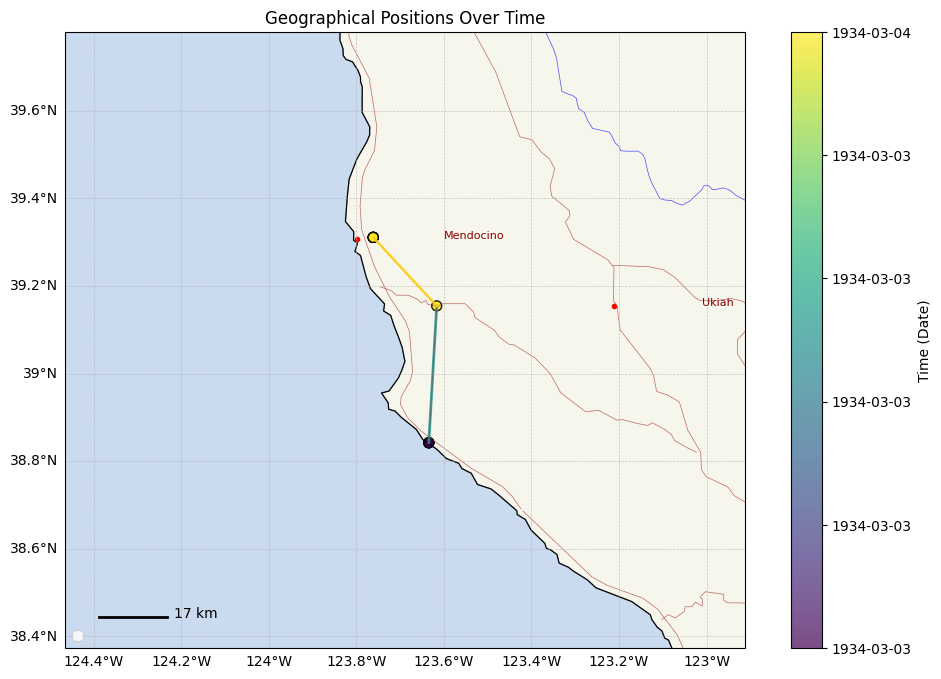

In [338]:
plot_geographical_positions(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=1, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

Beautiful linear expedition!

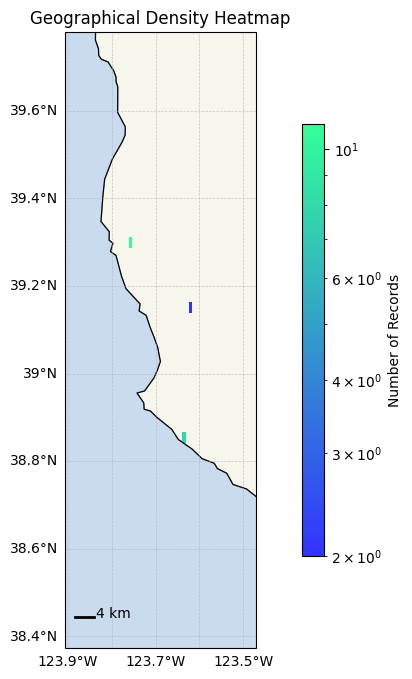

In [339]:
plot_geographical_heatmap(group0_df, lat_col='latitude1', lon_col='longitude1', grid_size=20,
                          zoom=1,  plot_rivers=True, plot_roads=True)


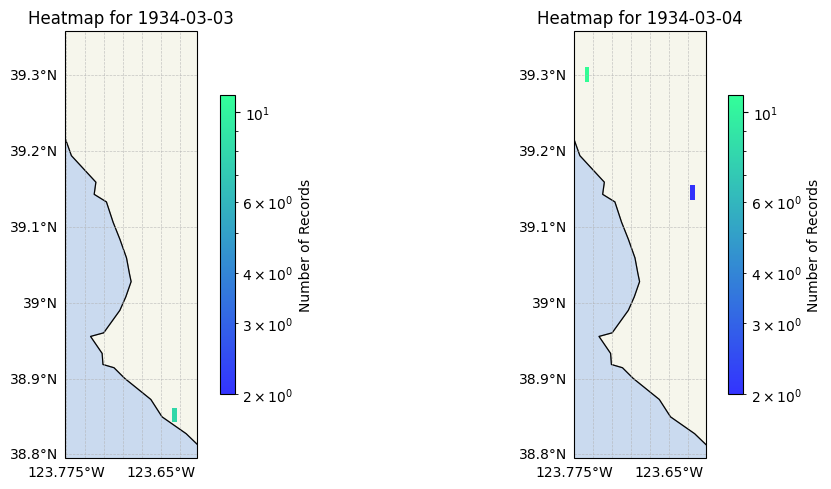

In [340]:
plot_geographical_heatmap_by_day(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',plot_rivers=True, plot_roads=True, grid_size=25)

Looks like it varies by the day, but there are often 2 separate miniclusters... probably two different teams.

That being said, it all looks like a single cluster to me!

In [341]:
df.loc[group0_df.index, 'cluster'] = '9'
df[df.cluster == '9'].__len__()

21

## f.) Collection Object ID: 245295

Grabbing a random madagascar one!

In [304]:
collectionobjectid = 367908

In [305]:
samp_colleventid_l[8]

104780

In [306]:
samp_record = df[df.collectionobjectid == collectionobjectid]
samp_record

collectionobjectid                                      text1 countamt  \
60016            367908.0  Terrestrial herb 0.5 m, flowers lavander.      2.0   

       collectingeventid  startdate enddate remarks  localityid  minelevation  \
60016            78191.0 1998-11-18     NaN     NaN     78191.0        1150.0   

       maxelevation  elevationaccuracy  latitude1  longitude1  \
60016        1250.0                NaN  -21.23333   47.383339   

                                            localityname namedplace  \
60016  Fianarantsoa, Ranomafana National Park, Ampasi...        NaN   

       geographyid cluster  
60016      27773.0     NaN

In [307]:
samp_record_lat = samp_record.latitude1.values[0]
samp_record_lon = samp_record.longitude1.values[0]
samp_record_startdate = samp_record.startdate.values[0]
print('lat:', samp_record_lat, '    lon:', samp_record_lon, '    start date:', samp_record_startdate)

lat: -21.2333297729     lon: 47.3833389282     start date: 1998-11-18T00:00:00.000000000


In [308]:
# Filter overall df to only records within 0.5º lat of the sample lat
test_df = df[abs(df.latitude1 - samp_record_lat) < 0.5].sort_values(by='startdate')

# Filter overall df to only records within 0.5º lon of the sample lon
test_df = test_df[abs(test_df.longitude1 - samp_record_lon) < 0.5].sort_values(by='startdate')

# Filter overall df to only records within 6 months of the sample startdate
test_df = test_df[test_df['startdate'].between(samp_record_startdate - pd.DateOffset(months=6), samp_record_startdate + pd.DateOffset(months=6))]


In [309]:
print(len(test_df))

test_df.head(2)

1072


collectionobjectid                                              text1  \
33340            203818.0  Suffrutescent herb to 1 m tall. Disk florets l...   
31656            193632.0  Shrub to 3 m tall. Flowers green and inconspic...   

      countamt  collectingeventid  startdate     enddate remarks  localityid  \
33340      2.0           229435.0 1998-10-30  1998-10-30     NaN    229435.0   
31656      4.0           203547.0 1998-10-30         NaN     NaN    203547.0   

       minelevation  maxelevation  elevationaccuracy  latitude1  longitude1  \
33340         869.0         869.0                0.0     -21.26   47.420000   
31656         869.0           0.0                NaN     -21.26   47.420002   

                                            localityname  \
33340  Fianarantsoa Province: Ranomafana National Par...   
31656  Fianarantsoa Province: Ranomafana National Par...   

                                              namedplace  geographyid cluster  
33340  Fianarantsoa Province: Ranomafana National Par...      27773.0     NaN  
31656  Fianarantsoa Province: Ranomafana National Par...      27773.0     NaN

In [310]:
test_df.localityname.value_counts()

localityname
Fianarantsoa, Ranomafana National Park, Ampasina Swamp.                                                                     47
Ranomafana National Park, Talatakely trail system S of Namorona River (trail route B-T- Amanda).                            43
Ranomafana National Park, Talatakely trail system S of Namorona River (vicinity of river near research station).            35
Fianarantsoa, Ranomafana National Park, Talatakely Trail System.                                                            35
Fianarantsoa, Ranomafana National Park, trail to Vatoharanana.                                                              27
                                                                                                                            ..
Ranomafana Ntl Park. Talatakely Trail System. Trail F in the vicinity of pt where Trail P diverges from it along the riv     1
Ramanofana National Park. At pasture off FZ trail, which is off F trail to the west. Talatakely pa

Okay, now there's a fair amount of variability... 

In [311]:
test_df.startdate.value_counts()

startdate
1998-11-04    103
1998-11-01     97
1998-11-18     90
1998-11-09     73
1998-11-03     70
1998-11-12     69
1998-11-05     61
1998-11-11     56
1998-10-31     53
1998-11-14     51
1998-11-02     50
1998-11-06     49
1998-10-30     44
1998-11-10     43
1998-11-13     42
1998-11-15     40
1998-11-16     28
1998-11-08     26
1998-11-17     14
1998-11-07      6
1998-11-19      4
1998-11-21      3
Name: count, dtype: int64

It looks like there is a single cluster

In [312]:
test_df.startdate.sort_values().unique()

<DatetimeArray>
['1998-10-30 00:00:00', '1998-10-31 00:00:00', '1998-11-01 00:00:00',
 '1998-11-02 00:00:00', '1998-11-03 00:00:00', '1998-11-04 00:00:00',
 '1998-11-05 00:00:00', '1998-11-06 00:00:00', '1998-11-07 00:00:00',
 '1998-11-08 00:00:00', '1998-11-09 00:00:00', '1998-11-10 00:00:00',
 '1998-11-11 00:00:00', '1998-11-12 00:00:00', '1998-11-13 00:00:00',
 '1998-11-14 00:00:00', '1998-11-15 00:00:00', '1998-11-16 00:00:00',
 '1998-11-17 00:00:00', '1998-11-18 00:00:00', '1998-11-19 00:00:00',
 '1998-11-21 00:00:00']
Length: 22, dtype: datetime64[ns]

In [313]:
samp_record

collectionobjectid                                      text1 countamt  \
60016            367908.0  Terrestrial herb 0.5 m, flowers lavander.      2.0   

       collectingeventid  startdate enddate remarks  localityid  minelevation  \
60016            78191.0 1998-11-18     NaN     NaN     78191.0        1150.0   

       maxelevation  elevationaccuracy  latitude1  longitude1  \
60016        1250.0                NaN  -21.23333   47.383339   

                                            localityname namedplace  \
60016  Fianarantsoa, Ranomafana National Park, Ampasi...        NaN   

       geographyid cluster  
60016      27773.0     NaN

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


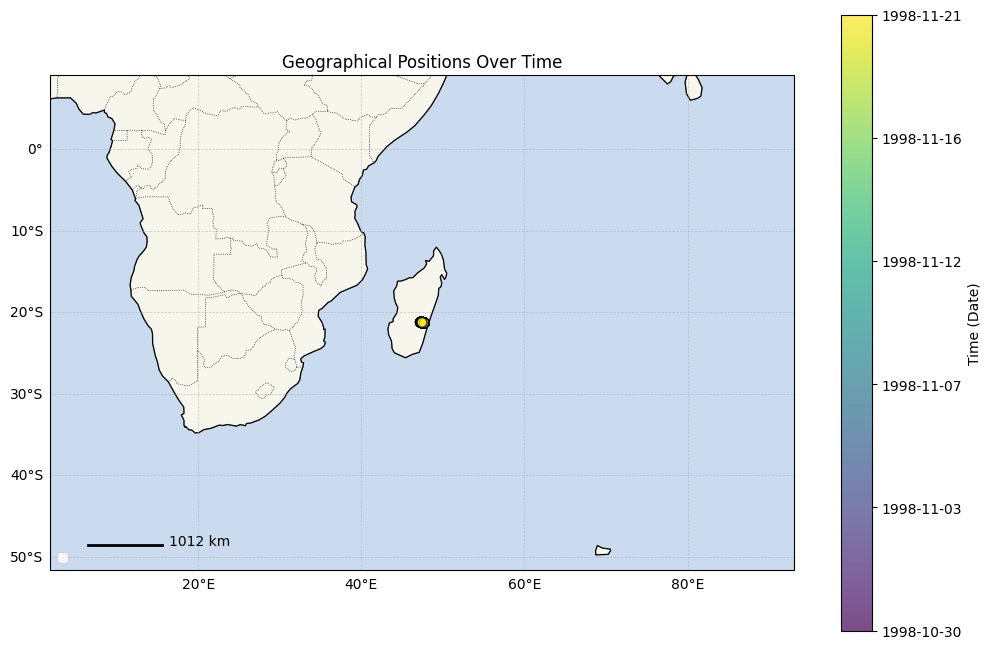

In [314]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=0.01, cluster_line=False)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


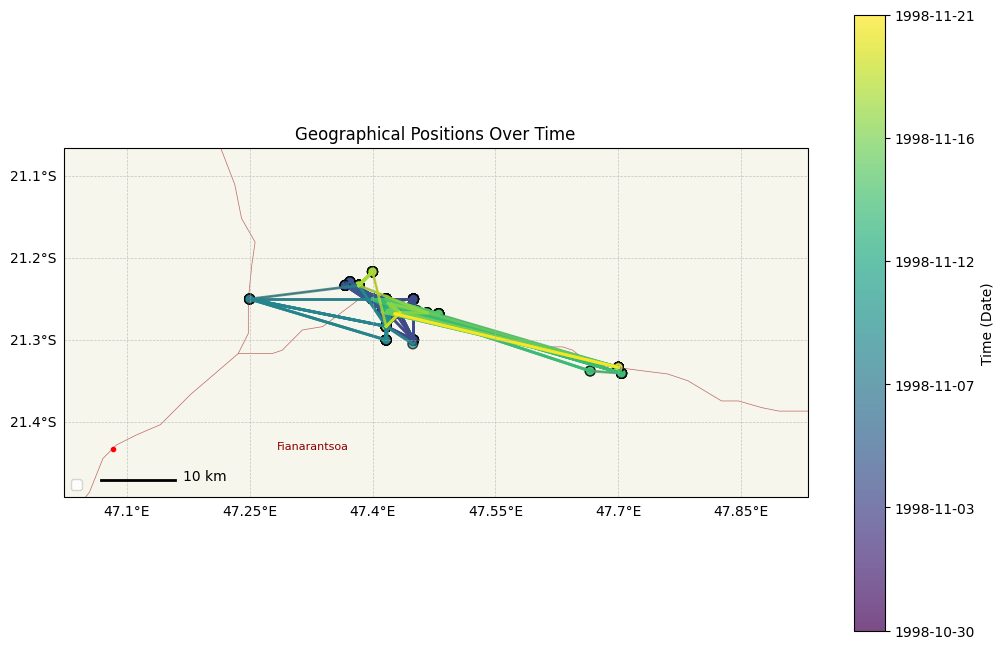

In [315]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=2, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

In [316]:
print(test_df.startdate.min())
print(test_df.startdate.max())

1998-10-30 00:00:00
1998-11-21 00:00:00


### i.) Cluster 10: ('1998-10-30', '1998-11-21')

In [317]:
group0_df = test_df

group0_df

collectionobjectid                                              text1  \
33340            203818.0  Suffrutescent herb to 1 m tall. Disk florets l...   
31656            193632.0  Shrub to 3 m tall. Flowers green and inconspic...   
2539              14945.0  Terrestrial on rocks along river, tuber 6-10 m...   
22320            135804.0            Pendant perennial on rocks along river.   
9828              59757.0  Epiphytic herb concealing tree trunk from grou...   
...                   ...                                                ...   
55853            342692.0  Tree 3 m, flowers greenish-yellow, inflorescen...   
46419            284914.0           Tree to 4.5 m; corolla pink; infrequent.   
3678              21675.0       Tree 4 m, fruits green, extremely glutinous.   
51894            318674.0  Tree 2.5 m (to 3 m in the area)* trunk straigh...   
22922            139591.0  Shrub to 0.5 m. Branches horizontally held and...   

      countamt  collectingeventid  startdate     enddate  \
33340      2.0           229435.0 1998-10-30  1998-10-30   
31656      4.0           203547.0 1998-10-30         NaN   
2539       6.0           113397.0 1998-10-30         NaN   
22320      1.0           179832.0 1998-10-30         NaN   
9828       6.0            71930.0 1998-10-30  1998-10-30   
...        ...                ...        ...         ...   
55853      5.0           135994.0 1998-11-19         NaN   
46419      5.0           164954.0 1998-11-19         NaN   
3678      10.0           157069.0 1998-11-21         NaN   
51894      4.0           210313.0 1998-11-21  1998-11-21   
22922      1.0           230689.0 1998-11-21  1998-11-21   

                                   remarks  localityid  minelevation  \
33340                                  NaN    229435.0         869.0   
31656                                  NaN    203547.0         869.0   
2539                                   NaN    113397.0           0.0   
22320                                  NaN    179832.0           0.0   
9828                                   NaN     71930.0         869.0   
...                                    ...         ...           ...   
55853                                  NaN    135994.0        1100.0   
46419               Montane rain forest.      164954.0        1000.0   
3678   Disturbed remnant forest patches.      157069.0        1500.0   
51894                      Common, shaded.    210313.0         900.0   
22922                                  NaN    230689.0           0.0   

       maxelevation  elevationaccuracy  latitude1  longitude1  \
33340         869.0                0.0 -21.260000   47.420000   
31656           0.0                NaN -21.260000   47.420002   
2539            NaN                NaN -21.260000   47.419727   
22320           NaN                NaN -21.260000   47.419727   
9828          869.0                0.0 -21.260000   47.420000   
...             ...                ...        ...         ...   
55853        1200.0                NaN -21.283331   47.416672   
46419           0.0                NaN -21.266670   47.433331   
3678         1700.0                NaN -21.333330   47.700001   
51894        1100.0                0.0 -21.268056   47.427500   
22922           0.0                0.0 -21.268056   47.427500   

                                            localityname  \
33340  Fianarantsoa Province: Ranomafana National Par...   
31656  Fianarantsoa Province: Ranomafana National Par...   
2539   Fianarantsoa, Ranomafana National Park, Talata...   
22320  Fianarantsoa, Ranomafana National Park, Talata...   
9828   Fianarantsoa Province: Ranomafana National Par...   
...                                                  ...   
55853  Fianarantsoa, Ranomafana National Park, Vatoha...   
46419  Ranomafana National Park, Talatakely trail sys...   
3678   Fianarantsoa, 12 km E of Ifanadiana, 1 km N of...   
51894  Fianarantsoa Province. Ranamofana National Par...   
22922  Fianarantsoa

In [318]:
group0_df.text1.isna().sum()/len(group0_df)

np.float64(0.024253731343283583)

In [319]:
group0_df.text1.value_counts()

text1
Terrestrial.                                                                                                  8
Corolla white.                                                                                                6
Epiphyte.                                                                                                     4
Epiphyte; frequent.                                                                                           3
Herb; corolla white; infrequent.                                                                              3
                                                                                                             ..
Tree 5 m tall. Petals pink.                                                                                   1
Herb; corolla dark purple; locally frequent.                                                                  1
Small tree to 4 m tall. Immature fruits green.                                                    

In [320]:
group0_df.localityname.value_counts()

localityname
Fianarantsoa, Ranomafana National Park, Ampasina Swamp.                                                                     47
Ranomafana National Park, Talatakely trail system S of Namorona River (trail route B-T- Amanda).                            43
Ranomafana National Park, Talatakely trail system S of Namorona River (vicinity of river near research station).            35
Fianarantsoa, Ranomafana National Park, Talatakely Trail System.                                                            35
Fianarantsoa, Ranomafana National Park, trail to Vatoharanana.                                                              27
                                                                                                                            ..
Ranomafana Ntl Park. Talatakely Trail System. Trail F in the vicinity of pt where Trail P diverges from it along the riv     1
Ramanofana National Park. At pasture off FZ trail, which is off F trail to the west. Talatakely pa

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


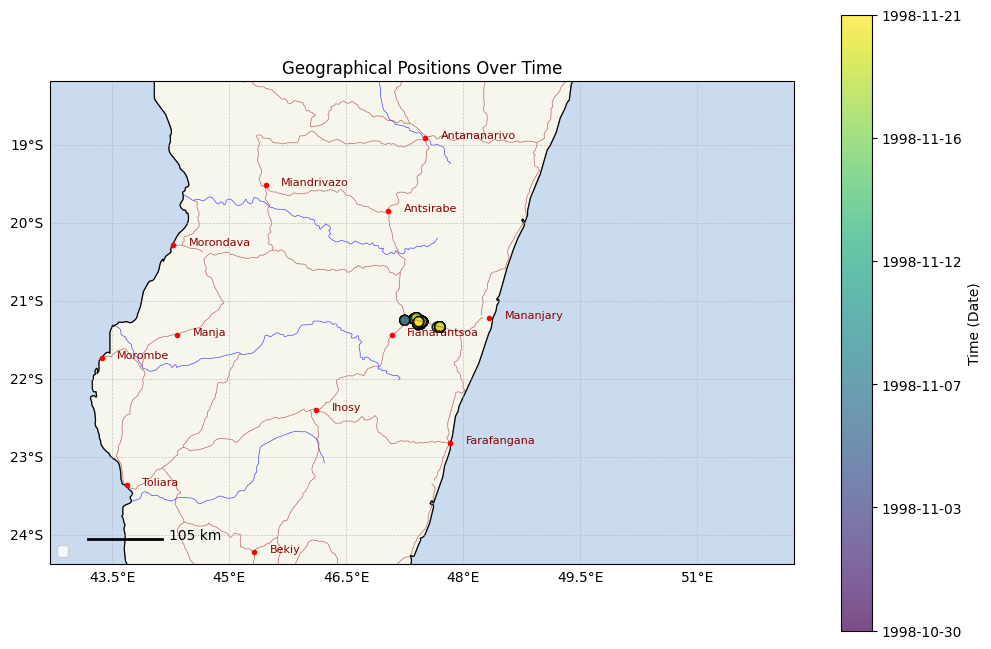

In [321]:
plot_geographical_positions(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=.1, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


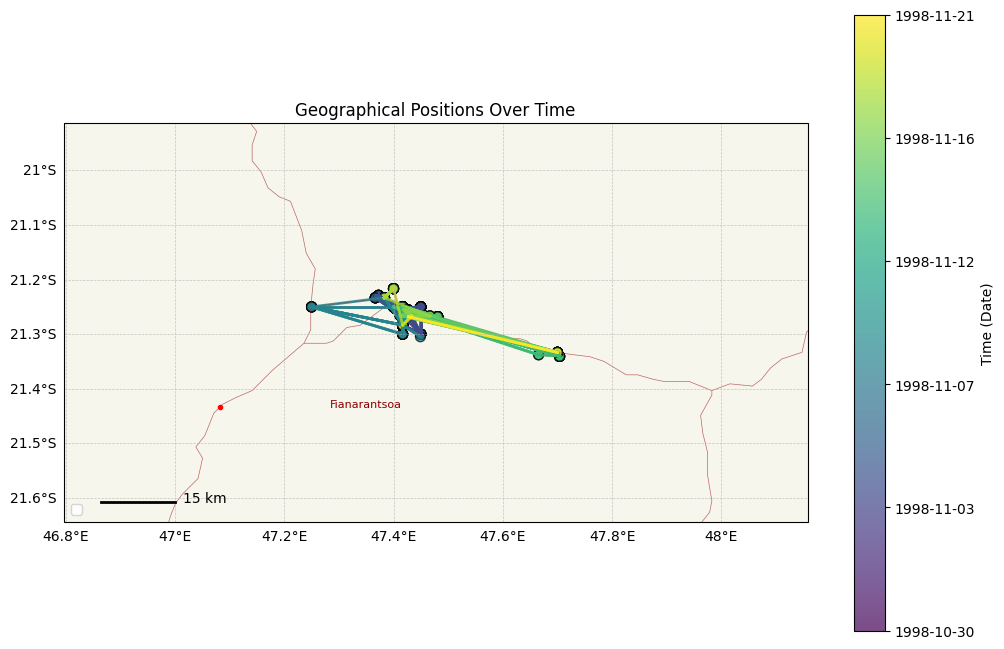

In [322]:
plot_geographical_positions(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=1, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

Beautiful linear expedition!

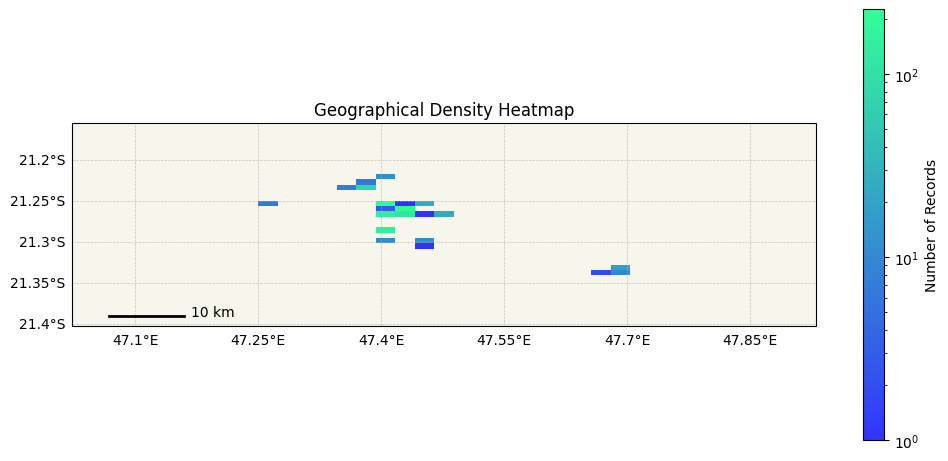

In [323]:
plot_geographical_heatmap(group0_df, lat_col='latitude1', lon_col='longitude1', grid_size=20,
                          zoom=2,  plot_rivers=True, plot_roads=True)


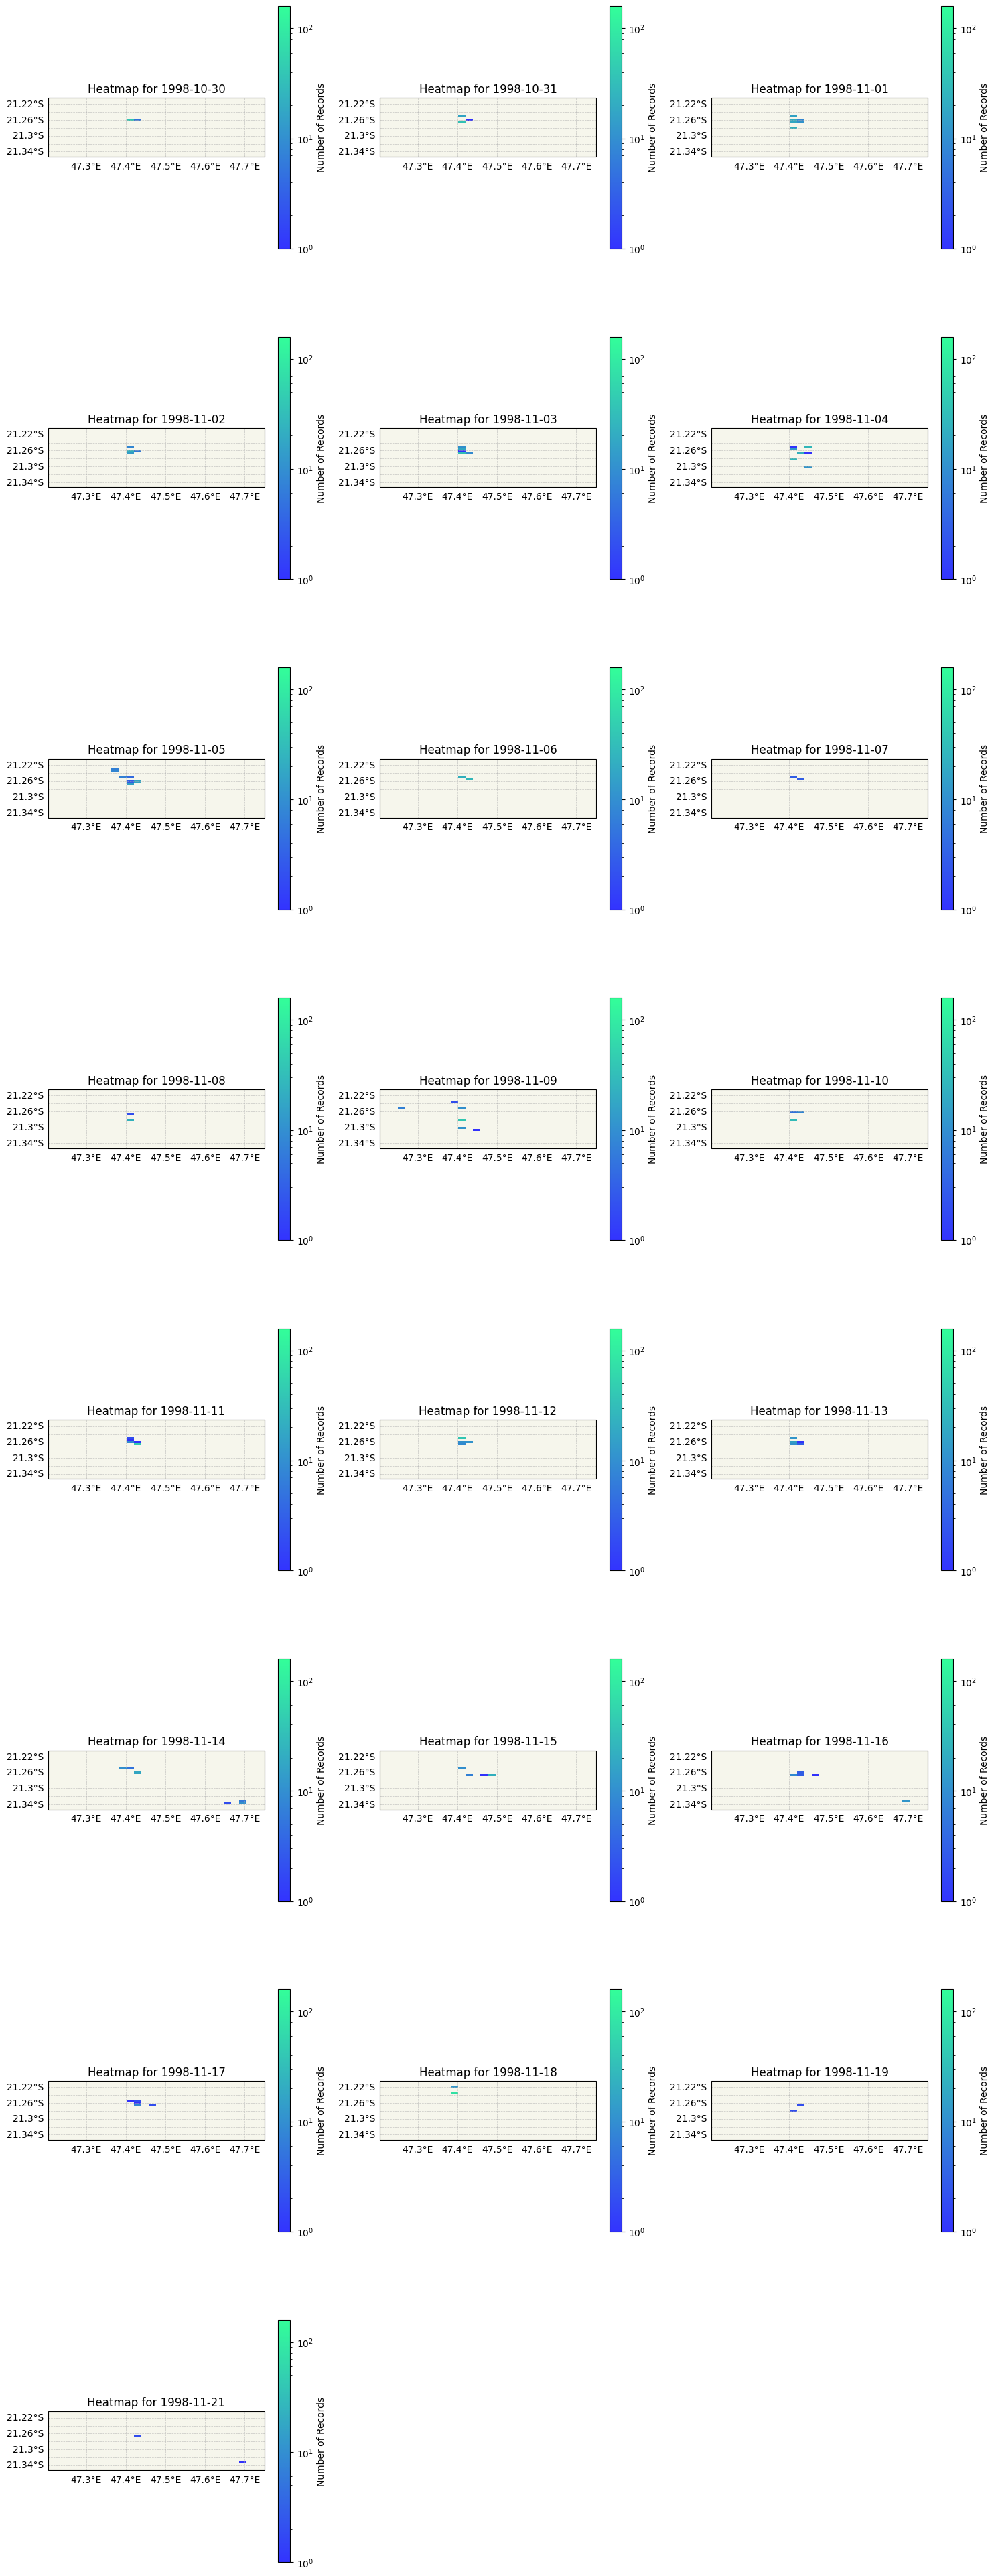

In [324]:
plot_geographical_heatmap_by_day(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',plot_rivers=True, plot_roads=True, grid_size=25)

It all looks like a single cluster to me!

In [531]:
df.loc[group0_df.index, 'cluster'] = '10'
df[df.cluster == '10'].__len__()

755

In [329]:
df.to_csv('../data/labeled_clean_df.csv')

Alright, now we've got all 10 of the clusters we set out to label! Lets find some summary stats on our clusters

# 2. Cluster Summary Stats

In [325]:
df.cluster.value_counts()

cluster
3    2857
5    2465
0     265
4      28
9      21
1       8
8       7
2       1
Name: count, dtype: int64

This looks like a pretty solid distribution of cluster size.

In [326]:
from geopy.distance import geodesic

# Function to calculate maximum time difference
def max_time_diff(group):
    return (group['startdate'].max() - group['startdate'].min()).days

# Function to calculate maximum distance
def max_lat(group):
    return (group['latitude1'].max() - group['latitude1'].min())

# Function to calculate maximum distance
def max_lon(group):
    return (group['longitude1'].max() - group['longitude1'].min())


# Function to calculate max differences within consecutive days in a cluster
def max_consecutive_differences(group):
    group = group.sort_values('startdate').reset_index(drop=True)
    group['time_diff'] = group['startdate'].diff().dt.days
    group['lat_diff'] = group['latitude1'].diff().abs()
    group['lon_diff'] = group['longitude1'].diff().abs()
    
    return pd.Series({
        'max_time_diff_consecutive': np.round(group['time_diff'].max(), 3),
        'max_lat_diff_consecutive': np.round(group['lat_diff'].max(), 3),
        'max_lon_diff_consecutive': np.round(group['lon_diff'].max(), 3),
    })

# Group by 'cluster' and compute summary statistics
summary_stats = df.groupby('cluster').agg(
    startdate_min=('startdate', 'min'),
    startdate_max=('startdate', 'max'),
    latitude_mean=('latitude1', 'mean'),
    latitude_std=('latitude1', 'std'),
    longitude_mean=('longitude1', 'mean'),
    longitude_std=('longitude1', 'std'),
    count=('cluster', 'size')
).reset_index()


# Add max time difference and max distance to summary stats
summary_stats['max_time_diff'] = df.groupby('cluster').apply(max_time_diff).values
summary_stats['max_lat_diff'] = np.round(df.groupby('cluster').apply(max_lat).values, 3)
summary_stats['max_lon_diff'] = np.round(df.groupby('cluster').apply(max_lon).values, 3)

# Add max consecutive differences
consecutive_diffs = df.groupby('cluster').apply(max_consecutive_differences).reset_index()
summary_stats = summary_stats.merge(consecutive_diffs, on='cluster')


/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_32793/1004204234.py:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_stats['max_time_diff'] = df.groupby('cluster').apply(max_time_diff).values
/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_32793/1004204234.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_stats['max_lat_diff'] = np.round(df.groupby('cluster').apply(

In [327]:
summary_stats

cluster startdate_min startdate_max  latitude_mean  latitude_std  \
0       0    1934-06-11    1934-06-16      41.552656      0.183647   
1       1    1934-08-01    1934-08-01      41.387087      0.041883   
2       2    1934-07-13    1934-07-13      41.232300           NaN   
3       3    1981-02-28    2004-11-14      28.482845      2.145861   
4       4    1990-05-25    1991-05-15      10.957203      0.084345   
5       5    1990-11-06    2006-12-15      29.610074      3.861862   
6       8    1933-11-07    1933-11-07      38.962184      0.000754   
7       9    1934-03-03    1934-03-04      39.117529      0.226031   

   longitude_mean  longitude_std  count  max_time_diff  max_lat_diff  \
0     -120.317713       0.122564    265              5         0.755   
1     -120.257513       0.043717      8              0         0.092   
2     -120.099100            NaN      1              0         0.000   
3       80.583879      59.624994   2857           8660         8.523   
4      -85.419812       0.058509     28            355         0.265   
5       58.826681      83.996513   2465           5883        10.590   
6     -123.686175       0.000425      7              0         0.002   
7     -123.699300       0.067043     21              1         0.469   

   max_lon_diff  max_time_diff_consecutive  max_lat_diff_consecutive  \
0         0.739                        1.0                     0.711   
1         0.109                        0.0                     0.092   
2         0.000                        NaN                       NaN   
3       217.671                     8404.0                     7.600   
4         0.226                       96.0                     0.261   
5       218.629                     5495.0                    10.451   
6         0.001                        0.0                     0.001   
7         0.145                        1.0                     0.469   

   max_lon_diff_consecutive  
0                     0.472  
1                     0.109  
2                       NaN  
3                   216.969  
4                     0.199  
5                   217.499  
6                     0.001  
7                     0.145

In [328]:
summary_stats.max_time_diff_consecutive.median()

np.float64(1.0)

# 3. Takeaways

We can now use these manually labeled clusters to check the efficacy of clustering algorithms we create! Good to have a little supervision...

## Things to consider

1. Increasing cluster size in more recent expeditions
    - Modern means of travel means people can cover more distance in less time!
    - This is probably overkill, but could be an interesting thing to look at
2. Subclusters
    - It could be interesting to break individual clusters into subclusters for different parties within a larger expedition. We say multiple instances of what looks like 2 parties collecting specimens from distinct zones within a single cluster.
    - What if there are two parties both part of a lager expedition that are far enough apart to be tagged as two separate clusters by our algorithm? Do we care about this? Should we look into it?
3. Density of expeditions
    - How closely packed in (time, distance) can separate clusters be? 
    - What do we feel comfortable setting as thresholds for our clustering algorithm?
4. Text
    - Do we want to use text in our clustering algorithm? And if so, how?
    - We could use it as a backup, in the case of missing spatiotemporal data...
    - We could also use the NLP homogeneity of a field like _text1_, _remarks_, or _localityname_ within a cluster as a metric of cluster confidence

## Thresholds

### Spatial (Lat / Lon)

In this notebook we located clusters by scanning for records within +- 0.5º of both latitude and longitude of a seed record. This in effect scans for records within a 1 square degree lat/lon box.

1º lat corresponds to ~70 km, so 1 square degree lat/lon covers and area of ~1400 km^2. This feels like a conservative area – if anything it may be too big, but I think it's a good starting point.

We could try to be fancy and use other methods for spatial clustering like a spatial aperture with a set radius, or a varying grid size based on global location. That being said, this grid scan method seemed to work pretty well, and is certainly the most simple spatial clustering method. Let's abide by the KISS mentality.

__Lets say 1 degree lat/lon is a reasonable value for our temporal epislon.__


### Temporal (startdate)

In this notebook, we have used __ONLY__ the _startdate_ field as our temporal variable. While there wasn't any specific instruction to do this, it is the only date variable I could find that has halfway-decent coverage, and represents the collection date. I think that's fine.

We identified clusters by first scanning for records within 6 months of the _startdate_ of a seed record, then breaking this into clusters from there. Through this, we found anywhere from 1 cluster to ~10 clusters. This is definitely too large to use as our clustering threshold. 

To determine an ideal temporal threshold, we need to focus on the time between consecutive records within an expedition cluster. The max time between consecutive records in our sample of manually labeled clusters was 10, whereas the median was 1 day. I'm a little skeptical of the 10 day threshold, as it may end up glomming multiple clusters together, especially in a place like California where its easy for CalAcademy scientists to revisit a site within a week.

It seems like a reasonable cutoff would be... 2 weeks? ... 5 days? ... a single day? It depends on how conservative vs aggressive we want to be in our clustering.

__For now, lets say 10 days is a reasonable value for our temporal epislon.__